# AlphaPept Systems Check

This notebook will run several tests and compare the performance to MaxQuant. Depending on the machine, this can take several hours.
Each run is called via the `test_ci.py` script, which downloads files to a temporary folder which can be specified in this file.

This notebook requires the `matplotlib_venn` (`!pip install matplotlib_venn`) package.

## Reference Data

Download MaxQuant reference files. Referance MaxQuant data from `PXD006109` and `PXD010012` were taken from the paper, the others were analyzed with `MaxQuant_1.6.14`, default settings w/o second peptides and provided with the given contaminants file.

In [1]:
import os
try:
    import wget
except ModuleNotFoundError:
    !pip install wget
    
FILE_DICT = {}
FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/1E2G1IwgcgdsCHC/download'
FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/Fn2uxeYNL60JSd3/download'
FILE_DICT['PXD010012_ref.txt'] = 'https://datashare.biochem.mpg.de/s/ps226k7Fme1K0jf/download'
FILE_DICT['PXD010012_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/pyhKMrytjdDU2sX/download'
FILE_DICT['bruker_HeLa_evd.txt'] = 'https://datashare.biochem.mpg.de/s/fRcoGuwlcbH2SBJ/download'
FILE_DICT['thermo_HeLa_evd.txt'] = 'https://datashare.biochem.mpg.de/s/p4Omj9K5hHmSoDl/download'

tmp_folder = os.path.join(os.getcwd(),'/temp')

if not os.path.isdir(tmp_folder):
    os.mkdir(tmp_folder)
    
for file in FILE_DICT:
    target = os.path.join(tmp_folder, file)
    if not os.path.isfile(target):
        wget.download(FILE_DICT[file], target)
        
software_1 = 'AlphaPept'
software_2 = 'MaxQuant'

## Single Files

Compare to the single HeLa test files

### Thermo Hela

In [2]:
%run -i test_ci.py thermo_hela

['test_ci.py', 'thermo_hela'] 2
2021-01-09 12:01:56 INFO - Currently 119.85 GB of memory available.
2021-01-09 12:01:56 INFO - System information: uname_result(system='Windows', node='PCMANN338', release='10', version='10.0.18362', machine='AMD64', processor='Intel64 Family 6 Model 85 Stepping 4, GenuineIntel')
2021-01-09 12:01:56 INFO - AlphaPept version 0.3.9-dev0
2021-01-09 12:01:56 INFO - Python version 3.8.6 | packaged by conda-forge | (default, Nov 27 2020, 18:58:29) [MSC v.1916 64 bit (AMD64)]
2021-01-09 12:01:56 INFO - Numba version 0.51.2
2021-01-09 12:01:56 INFO - Check for settings not completely implemented yet.
2021-01-09 12:01:56 INFO - Checking CPU settings.
2021-01-09 12:01:56 INFO - Setting number of processes to 24.
2021-01-09 12:01:56 INFO - Checking if files exist.
2021-01-09 12:01:56 INFO - Results path was not set. Setting to E:\test_temp\results.hdf
2021-01-09 12:01:56 INFO - Shortnames not set. Setting to filename.
2021-01-09 12:01:56 INFO - No database path set


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 12:01:58 ERROR - This FASTA entry contains unknown AAs {'X'} - Peptides with unknown AAs will be skipped: 
 {'id': 'Q9GF61', 'name': 'sp|Q9GF61|MATK_ARALP', 'description': 'sp|Q9GF61|MATK_ARALP Maturase K OS=Arabidopsis lyrata subsp. petraea OX=59691 GN=matK PE=3 SV=1', 'sequence': 'MEKFQGYLEFDGARQQSFLYPLFFREYIYVLAYDHGLNRLNRNRSIFLENTDYDKKYSSLIVKRLILRMYEQNRLIIPTKDLNQNSFLGHTSLFYYQMISVLFAVIVEIPFSLRLGSSFQGKQLKKSYNLQSIHSILPFLEDKLAHFNYVLDVLIPYPIHLEILVQILRYWVKDASSLHFFRFCLYEYCNCKNFYIKKKSILNPRFFLFLYNSHVCEYESIFFFLRKRSSHLRSPSYEVLFERIFFYGKIQHFFKVFVNNFPAILGLLKDPFIHYVRYHGRCILATKDTPLLMNKWKYFFVNLWQCYFSVWFQSQKVNINQLSKDNLEFLGYLSSLRLNPLVVRSQMLENSFLIDNVRIKLDSKIPISSIIGSLAKDKFCNVLGHPISKATWTDSSDFDILNRFVRICKNISHYYSGSSKKKNLYRIKYILRLCCVKTLARKXKSTVCAFLKRLGSGLLEEFLTGEDQVLSLIFPRSYYASKRLYRVRIWYLDILYLNDLVNHE'}

2021-01-09 12:01:58 ERROR - This FASTA entry contains unknown AAs {'X'} - Peptides with unknown AAs will be skipped: 
 {'id': 'P80838', 'name': 'sp|P80838|CWP17_ARATH', 'description': 'sp|P80838|CW

100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:48<00:00, 46.23s/it]

2021-01-09 12:04:03 INFO - Digested 36,789 proteins and generated 8,960,078 spectra
2021-01-09 12:05:59 INFO - Database saved to E:\test_temp\database.hdf. Filesize of database is 4.65 GB



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 12:06:13 INFO - Processing 1 files for step raw_conversion
2021-01-09 12:06:13 INFO - File E:/test_temp/thermo_HeLa has extension .raw - converting from Thermo.
2021-01-09 12:08:24 INFO - File conversion complete. Extracted 120226 precursors.
2021-01-09 12:08:29 INFO - File conversion of file E:/test_temp/thermo_HeLa.raw complete.




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 12:08:35 INFO - Processing 1 files for step find_features
2021-01-09 12:08:35 INFO - No *.hdf file with features found for E:/test_temp/thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2021-01-09 12:08:35 INFO - Feature finding on E:/test_temp/thermo_HeLa.raw




  0%|                                                           | 4.72411186696901e-06/1 [00:00<22:31:57, 81118.03s/it]

  0%|▏                                                         | 0.0027588813303099017/1 [00:00<15:43:56, 56793.55s/it]

  1%|▎                                                          | 0.005172902494331066/1 [00:00<10:59:22, 39768.02s/it]

  1%|▍                                                           | 0.007572751322751323/1 [00:00<7:40:39, 27850.63s/it]

  1%|▌                                                           | 0.009939531368102796/1 [00:00<5:21:54, 19508.78s/it]

  1%|▊                                                             | 0.0123630007558579/1 [00:00<3:45:01, 13670.12s/it]

  1%|▊                                                            | 0.014266817838246409/1 [00:01<2:37:29, 9586.32s/it]

  2%|▉                                                            | 0.016118669690098262/1 [00:01<1:50:21, 6730.29s/it]

  2%|█                        

2021-01-09 12:08:44 INFO - Loaded 13,230 centroids.




 13%|████████                                                        | 0.12500944822373394/1 [00:21<25:53, 1775.52s/it]

 13%|████████                                                        | 0.12520786092214664/1 [00:21<20:30, 1406.83s/it]

 13%|████████                                                        | 0.12540627362055934/1 [00:21<16:34, 1137.31s/it]

 13%|████████▏                                                        | 0.12562358276643992/1 [00:21<13:45, 944.51s/it]

 13%|████████▏                                                        | 0.12587868480725622/1 [00:22<11:36, 796.70s/it]

 13%|████████▏                                                        | 0.12610544217687075/1 [00:22<10:06, 693.69s/it]

 13%|████████▏                                                        | 0.12632275132275134/1 [00:22<09:13, 633.87s/it]

 13%|████████▏                                                        | 0.12657785336356764/1 [00:22<08:28, 582.46s/it]

 13%|████████▏                

14%|████████▊                                                        | 0.13631897203325774/1 [00:33<10:58, 762.54s/it]

 14%|████████▊                                                        | 0.13647014361300075/1 [00:33<10:38, 739.91s/it]

 14%|█████████                                                         | 0.1366307634164777/1 [00:33<10:21, 719.28s/it]

 14%|█████████                                                         | 0.1368008314436886/1 [00:34<10:16, 714.40s/it]

 14%|█████████                                                         | 0.1369520030234316/1 [00:34<10:34, 735.36s/it]

 14%|████████▉                                                        | 0.13709372637944067/1 [00:34<10:33, 734.49s/it]

 14%|████████▉                                                        | 0.13723544973544974/1 [00:34<10:54, 758.17s/it]

 14%|████████▉                                                        | 0.13738662131519275/1 [00:34<10:48, 752.32s/it]

 14%|████████▉                   

15%|█████████▌                                                       | 0.14631519274376417/1 [00:49<10:24, 731.29s/it]

 15%|█████████▌                                                       | 0.14647581254724112/1 [00:49<10:28, 736.18s/it]

 15%|█████████▌                                                       | 0.14663643235071808/1 [00:49<10:05, 709.66s/it]

 15%|█████████▌                                                       | 0.14678760393046109/1 [00:50<09:54, 696.52s/it]

 15%|█████████▊                                                         | 0.146948223733938/1 [00:50<09:42, 682.38s/it]

 15%|█████████▌                                                       | 0.14710884353741496/1 [00:50<09:44, 685.14s/it]

 15%|█████████▌                                                       | 0.14726001511715797/1 [00:50<09:42, 682.53s/it]

 15%|█████████▌                                                       | 0.14745842781557067/1 [00:50<09:20, 656.88s/it]

 15%|█████████▌                  

15%|█████████▉                                                      | 0.15483749055177626/1 [01:09<15:18, 1086.78s/it]

 15%|██████████▏                                                       | 0.1549697656840514/1 [01:09<14:00, 994.93s/it]

 16%|██████████▏                                                       | 0.1550925925925926/1 [01:10<14:04, 999.18s/it]

 16%|██████████                                                       | 0.15520597127739985/1 [01:10<13:54, 988.35s/it]

 16%|█████████▉                                                      | 0.15531934996220711/1 [01:10<14:41, 1043.00s/it]

 16%|██████████                                                       | 0.1554232804232804/1 [01:10<14:36, 1037.76s/it]

 16%|█████████▉                                                      | 0.15553665910808767/1 [01:10<14:05, 1001.72s/it]

 16%|██████████▎                                                       | 0.155640589569161/1 [01:10<14:21, 1020.39s/it]

 16%|██████████                  

16%|██████████▍                                                      | 0.1614795918367347/1 [01:24<36:31, 2613.06s/it]

 16%|██████████▎                                                     | 0.16156462585034015/1 [01:24<30:50, 2206.91s/it]

 16%|██████████▎                                                     | 0.16164965986394558/1 [01:24<27:11, 1946.02s/it]

 16%|██████████▎                                                     | 0.16173469387755102/1 [01:25<26:30, 1896.85s/it]

 16%|██████████▎                                                     | 0.16183862433862434/1 [01:25<23:06, 1653.93s/it]

 16%|██████████▌                                                      | 0.1619708994708995/1 [01:25<19:28, 1394.50s/it]

 16%|██████████▌                                                      | 0.1621031746031746/1 [01:25<17:06, 1225.21s/it]

 16%|██████████▍                                                     | 0.16220710506424793/1 [01:25<16:19, 1169.16s/it]

 16%|██████████▍                 

17%|██████████▊                                                     | 0.16799886621315194/1 [01:46<55:58, 4037.13s/it]

 17%|██████████▍                                                   | 0.16808390022675737/1 [01:47<1:27:13, 6291.24s/it]

 17%|██████████▌                                                    | 0.1681689342403628/1 [01:48<1:06:45, 4815.86s/it]

 17%|██████████▊                                                     | 0.16825396825396827/1 [01:48<51:52, 3741.93s/it]

 17%|██████████▊                                                     | 0.16834845049130764/1 [01:48<40:59, 2957.48s/it]

 17%|██████████▊                                                     | 0.16843348450491308/1 [01:48<33:57, 2450.80s/it]

 17%|██████████▉                                                      | 0.1685185185185185/1 [01:48<28:51, 2082.81s/it]

 17%|██████████▊                                                     | 0.16860355253212395/1 [01:48<25:31, 1841.66s/it]

 17%|██████████▉                 

17%|███████████▏                                                    | 0.17404572940287227/1 [02:04<17:30, 1272.28s/it]

 17%|███████████▎                                                     | 0.1741307634164777/1 [02:04<17:32, 1274.24s/it]

 17%|███████████▏                                                    | 0.17421579743008314/1 [02:04<18:31, 1345.66s/it]

 17%|███████████▏                                                    | 0.17430083144368858/1 [02:05<18:12, 1322.89s/it]

 17%|███████████▏                                                    | 0.17439531368102795/1 [02:05<17:24, 1265.01s/it]

 17%|███████████▏                                                    | 0.17448034769463341/1 [02:05<17:19, 1259.40s/it]

 17%|███████████▏                                                    | 0.17456538170823885/1 [02:05<17:25, 1266.90s/it]

 17%|███████████                                                    | 0.1746504157218443/1 [02:06<1:20:17, 5837.43s/it]

 17%|███████████                 

18%|███████████▌                                                    | 0.18002645502645503/1 [02:22<20:02, 1466.48s/it]

 18%|███████████▋                                                     | 0.1801492819349962/1 [02:22<18:04, 1322.60s/it]

 18%|███████████▌                                                    | 0.18025321239606953/1 [02:22<16:47, 1228.52s/it]

 18%|███████████▌                                                    | 0.18035714285714285/1 [02:22<15:46, 1154.88s/it]

 18%|███████████▌                                                    | 0.18046107331821618/1 [02:22<15:04, 1103.64s/it]

 18%|███████████▋                                                     | 0.1805650037792895/1 [02:22<15:45, 1154.04s/it]

 18%|███████████▏                                                  | 0.18065948601662887/1 [02:24<1:24:49, 6211.12s/it]

 18%|███████████▏                                                  | 0.18075396825396825/1 [02:24<1:04:20, 4712.39s/it]

 18%|███████████▌                

19%|████████████                                                     | 0.1860827664399093/1 [02:39<15:30, 1143.75s/it]

 19%|███████████▌                                                  | 0.18617724867724866/1 [02:41<1:35:41, 7054.51s/it]

 19%|███████████▌                                                  | 0.18627173091458804/1 [02:41<1:11:44, 5290.00s/it]

 19%|███████████▉                                                    | 0.18636621315192745/1 [02:42<54:48, 4041.30s/it]

 19%|███████████▎                                                 | 0.18644179894179894/1 [02:48<6:33:31, 29022.85s/it]

 19%|███████████▌                                                  | 0.1865362811791383/1 [02:48<4:39:59, 20651.53s/it]

 19%|███████████▍                                                 | 0.18663076341647772/1 [02:48<3:20:31, 14792.62s/it]

 19%|███████████▍                                                 | 0.18674414210128495/1 [02:48<2:24:38, 10670.76s/it]

 19%|███████████▌                

19%|████████████▎                                                   | 0.19223356009070294/1 [03:06<23:13, 1725.45s/it]

 19%|████████████▎                                                   | 0.19233749055177626/1 [03:06<20:13, 1502.34s/it]

 19%|████████████▎                                                   | 0.19244142101284958/1 [03:06<18:41, 1388.22s/it]

 19%|████████████▌                                                    | 0.1925453514739229/1 [03:06<17:07, 1272.25s/it]

 19%|████████████▎                                                   | 0.19264928193499622/1 [03:06<16:46, 1246.08s/it]

 19%|████████████▌                                                    | 0.1927437641723356/1 [03:06<16:56, 1259.49s/it]

 19%|████████████▎                                                   | 0.19283824640967498/1 [03:07<17:43, 1318.10s/it]

 19%|████████████▎                                                   | 0.19292328042328044/1 [03:07<18:01, 1339.41s/it]

 19%|████████████▎               

20%|████████████▎                                                 | 0.19831821617535905/1 [03:25<1:04:34, 4832.42s/it]

 20%|████████████▋                                                   | 0.19841269841269843/1 [03:25<49:56, 3738.50s/it]

 20%|████████████▋                                                   | 0.19852607709750567/1 [03:26<38:45, 2901.14s/it]

 20%|████████████▋                                                   | 0.19861111111111113/1 [03:26<31:50, 2383.84s/it]

 20%|████████████▋                                                   | 0.19869614512471656/1 [03:26<27:27, 2056.62s/it]

 20%|█████████████                                                     | 0.198781179138322/1 [03:26<24:24, 1828.01s/it]

 20%|████████████▋                                                   | 0.19887566137566137/1 [03:26<21:22, 1601.07s/it]

 20%|████████████▋                                                   | 0.19897014361300075/1 [03:26<19:44, 1478.10s/it]

 20%|████████████▋               

20%|█████████████▎                                                   | 0.2043934240362812/1 [03:43<14:01, 1058.24s/it]

 20%|█████████████                                                   | 0.20450680272108845/1 [03:43<13:39, 1029.93s/it]

 20%|█████████████                                                   | 0.20461073318216175/1 [03:43<13:33, 1022.30s/it]

 20%|█████████████                                                   | 0.20471466364323507/1 [03:43<13:42, 1034.85s/it]

 20%|█████████████                                                   | 0.20482804232804233/1 [03:44<13:31, 1020.36s/it]

 20%|█████████████                                                   | 0.20493197278911565/1 [03:44<13:27, 1015.88s/it]

 21%|█████████████                                                   | 0.20503590325018894/1 [03:44<13:45, 1038.05s/it]

 21%|█████████████▏                                                  | 0.20513983371126226/1 [03:44<14:03, 1061.51s/it]

 21%|█████████████▏              

21%|█████████████▎                                                 | 0.2106859410430839/1 [04:11<1:20:26, 6114.75s/it]

 21%|█████████████▎                                                 | 0.2107804232804233/1 [04:11<1:00:39, 4611.00s/it]

 21%|█████████████▋                                                   | 0.2108843537414966/1 [04:11<46:25, 3529.61s/it]

 21%|█████████████▌                                                  | 0.21098828420256993/1 [04:11<36:27, 2771.94s/it]

 21%|█████████████▋                                                   | 0.2111111111111111/1 [04:11<28:47, 2189.53s/it]

 21%|█████████████▌                                                  | 0.21122448979591837/1 [04:11<23:57, 1822.67s/it]

 21%|█████████████▌                                                  | 0.21132842025699167/1 [04:11<22:03, 1677.91s/it]

 21%|█████████████▉                                                    | 0.211432350718065/1 [04:12<21:44, 1653.67s/it]

 21%|█████████████▌              

22%|██████████████                                                   | 0.2167517006802721/1 [04:29<17:15, 1322.64s/it]

 22%|█████████████▉                                                  | 0.21684618291761149/1 [04:29<16:31, 1266.39s/it]

 22%|█████████████▉                                                  | 0.21694066515495086/1 [04:29<15:51, 1215.50s/it]

 22%|██████████████▎                                                   | 0.217072940287226/1 [04:29<14:11, 1087.18s/it]

 22%|█████████████▉                                                  | 0.21717687074829933/1 [04:29<13:47, 1056.52s/it]

 22%|█████████████▉                                                  | 0.21728080120937265/1 [04:30<14:38, 1122.48s/it]

 22%|█████████████▉                                                  | 0.21737528344671203/1 [04:30<15:00, 1149.98s/it]

 22%|██████████████▏                                                  | 0.2174697656840514/1 [04:30<14:43, 1129.45s/it]

 22%|█████████████▉              

22%|██████████████▎                                                 | 0.22363000755857898/1 [04:50<16:13, 1254.29s/it]

 22%|██████████████▎                                                 | 0.22372448979591836/1 [04:50<15:57, 1233.19s/it]

 22%|██████████████▎                                                 | 0.22381897203325773/1 [04:50<15:37, 1207.20s/it]

 22%|██████████████▌                                                  | 0.2239134542705971/1 [04:51<15:05, 1167.24s/it]

 22%|██████████████▌                                                  | 0.2240079365079365/1 [04:51<14:46, 1141.88s/it]

 22%|██████████████▌                                                  | 0.2241118669690098/1 [04:51<14:28, 1119.06s/it]

 22%|██████████████▌                                                  | 0.2242063492063492/1 [04:51<14:24, 1114.16s/it]

 22%|█████████████▉                                                | 0.2243008314436886/1 [05:00<6:26:21, 29885.03s/it]

 22%|█████████████▋              

23%|██████████████▋                                                 | 0.22967687074829932/1 [05:16<39:21, 3065.35s/it]

 23%|██████████████▋                                                 | 0.22976190476190478/1 [05:16<32:13, 2509.62s/it]

 23%|██████████████▉                                                  | 0.2298469387755102/1 [05:16<27:39, 2155.25s/it]

 23%|██████████████▋                                                 | 0.22993197278911565/1 [05:16<24:07, 1879.89s/it]

 23%|██████████████▋                                                 | 0.23003590325018897/1 [05:16<20:56, 1631.29s/it]

 23%|██████████████▋                                                 | 0.23013038548752834/1 [05:17<18:55, 1474.60s/it]

 23%|██████████████▋                                                 | 0.23022486772486772/1 [05:17<17:47, 1387.30s/it]

 23%|██████████████▉                                                  | 0.2303193499622071/1 [05:17<17:01, 1327.57s/it]

 23%|██████████████▋             

24%|███████████████▏                                                | 0.23658352229780802/1 [05:38<31:53, 2507.11s/it]

 24%|███████████████▏                                                | 0.23672524565381708/1 [05:38<25:05, 1971.91s/it]

 24%|███████████████▏                                                | 0.23686696900982615/1 [05:38<20:31, 1613.85s/it]

 24%|███████████████▏                                                | 0.23698979591836733/1 [05:38<17:31, 1377.50s/it]

 24%|███████████████▏                                                | 0.23712207105064248/1 [05:38<15:19, 1204.97s/it]

 24%|███████████████▏                                                | 0.23726379440665155/1 [05:39<13:49, 1087.99s/it]

 24%|███████████████▏                                                | 0.23739606953892667/1 [05:39<12:48, 1007.18s/it]

 24%|███████████████▍                                                 | 0.23753779289493576/1 [05:39<11:46, 926.37s/it]

 24%|███████████████▍            

24%|███████████████▋                                                | 0.24488851095993952/1 [06:13<55:02, 4373.01s/it]

 25%|███████████████▋                                                | 0.24503023431594861/1 [06:13<41:31, 3300.24s/it]

 25%|███████████████▋                                                | 0.24516250944822374/1 [06:13<32:11, 2558.27s/it]

 25%|███████████████▋                                                | 0.24529478458049886/1 [06:13<25:30, 2027.55s/it]

 25%|████████████████▏                                                 | 0.245427059712774/1 [06:13<20:48, 1654.46s/it]

 25%|████████████████▏                                                 | 0.245578231292517/1 [06:13<17:33, 1396.77s/it]

 25%|███████████████▋                                                | 0.24571050642479214/1 [06:13<15:17, 1216.67s/it]

 25%|███████████████▉                                                 | 0.2458427815570673/1 [06:13<13:45, 1095.13s/it]

 25%|███████████████▉            

2021-01-09 12:15:10 INFO - A total of 992,051 hills extracted. Average hill length 16.04




 25%|███████████████▌                                              | 0.2500001260015866/1 [06:38<5:03:45, 24300.02s/it]

 25%|███████████████▎                                             | 0.25002809835381445/1 [06:38<3:47:06, 18169.82s/it]

 25%|███████████████▌                                              | 0.2500819010312978/1 [06:38<2:46:00, 13281.87s/it]

 25%|███████████████▊                                               | 0.2503020258031089/1 [06:38<1:58:06, 9452.51s/it]

 25%|███████████████▌                                              | 0.25046444184825173/1 [06:38<1:24:58, 6802.16s/it]

 25%|███████████████▊                                               | 0.2506359300076307/1 [06:38<1:01:43, 4942.52s/it]

 25%|████████████████▎                                                | 0.2508002360765727/1 [06:38<45:30, 3644.10s/it]

 25%|████████████████                                                | 0.25101922683410427/1 [06:38<33:44, 2703.28s/it]

 25%|████████████████         

26%|█████████████████                                                | 0.26225088226310944/1 [06:52<04:49, 392.43s/it]

 26%|█████████████████                                                | 0.26252090366321895/1 [06:52<04:47, 390.20s/it]

 26%|█████████████████▎                                                | 0.2628257015012333/1 [06:52<04:44, 386.02s/it]

 26%|█████████████████▎                                                | 0.2631419654836294/1 [06:52<04:32, 369.45s/it]

 26%|█████████████████▍                                                | 0.2634166489424435/1 [06:52<04:33, 371.50s/it]

 26%|█████████████████▏                                               | 0.26369675046948193/1 [06:52<04:32, 370.66s/it]

 26%|█████████████████▏                                               | 0.26397710399969354/1 [06:52<04:31, 368.31s/it]

 26%|█████████████████▏                                               | 0.26427585376155055/1 [06:52<04:27, 364.12s/it]

 26%|█████████████████▍          

28%|██████████████████                                               | 0.27708769508825654/1 [06:59<08:10, 678.52s/it]

 28%|██████████████████                                               | 0.27729370768236716/1 [06:59<07:32, 625.85s/it]

 28%|██████████████████▎                                               | 0.2775003502844108/1 [06:59<07:15, 602.53s/it]

 28%|██████████████████                                               | 0.27769237670240743/1 [06:59<07:00, 582.82s/it]

 28%|██████████████████▎                                               | 0.2779141394948445/1 [06:59<06:46, 563.54s/it]

 28%|██████████████████                                               | 0.27813943033170674/1 [06:59<06:32, 543.75s/it]

 28%|██████████████████▎                                               | 0.2783722812637657/1 [06:59<06:11, 515.12s/it]

 28%|██████████████████▍                                               | 0.2785699777531599/1 [07:00<06:13, 518.06s/it]

 28%|██████████████████          

29%|██████████████████▊                                              | 0.28959448657377496/1 [07:06<07:12, 608.99s/it]

 29%|██████████████████▊                                              | 0.28977731487594893/1 [07:06<06:59, 591.25s/it]

 29%|██████████████████▊                                              | 0.28997261733519747/1 [07:06<06:56, 586.03s/it]

 29%|██████████████████▊                                              | 0.29014397949298976/1 [07:06<07:09, 605.40s/it]

 29%|██████████████████▊                                              | 0.29031420763650256/1 [07:06<07:13, 610.77s/it]

 29%|██████████████████▉                                              | 0.29049930396723556/1 [07:06<07:09, 605.91s/it]

 29%|██████████████████▉                                              | 0.29067394216627973/1 [07:07<07:05, 600.03s/it]

 29%|██████████████████▉                                              | 0.29086029851287887/1 [07:07<06:56, 587.34s/it]

 29%|███████████████████▏        

30%|███████████████████▌                                             | 0.30142855558837195/1 [07:13<06:57, 597.08s/it]

 30%|████████████████████▏                                              | 0.301603571792176/1 [07:13<06:57, 597.87s/it]

 30%|███████████████████▉                                              | 0.3017947161990664/1 [07:13<06:45, 580.53s/it]

 30%|███████████████████▉                                              | 0.3019796865282128/1 [07:13<06:40, 574.02s/it]

 30%|███████████████████▋                                             | 0.30215432472725695/1 [07:13<06:43, 578.53s/it]

 30%|███████████████████▋                                             | 0.30234332710717493/1 [07:13<06:49, 586.25s/it]

 30%|███████████████████▋                                             | 0.30251909932049864/1 [07:14<06:51, 590.45s/it]

 30%|███████████████████▉                                              | 0.3026965095544483/1 [07:14<06:49, 587.41s/it]

 30%|███████████████████▋        

31%|████████████████████▋                                             | 0.3133001730757794/1 [07:20<06:54, 603.07s/it]

 31%|████████████████████▋                                             | 0.3134789693271818/1 [07:20<07:00, 612.42s/it]

 31%|████████████████████▋                                             | 0.3136580175817574/1 [07:20<06:52, 601.56s/it]

 31%|████████████████████▋                                             | 0.3138264817030576/1 [07:20<06:55, 605.73s/it]

 31%|████████████████████▍                                            | 0.31402443019562504/1 [07:20<06:44, 589.56s/it]

 31%|████████████████████▋                                             | 0.3142067544914525/1 [07:21<06:44, 590.39s/it]

 31%|████████████████████▋                                             | 0.3143767306317921/1 [07:21<06:48, 596.42s/it]

 31%|████████████████████▊                                             | 0.3145658590132967/1 [07:21<06:44, 590.00s/it]

 31%|████████████████████▍       

33%|█████████████████████▏                                           | 0.32532677251471953/1 [07:27<06:31, 580.21s/it]

 33%|█████████████████████▍                                            | 0.3255011587105905/1 [07:27<06:37, 589.24s/it]

 33%|█████████████████████▏                                           | 0.32567239486679617/1 [07:27<06:55, 616.05s/it]

 33%|█████████████████████▊                                             | 0.325862405259407/1 [07:27<06:50, 608.40s/it]

 33%|█████████████████████▊                                             | 0.326059849745628/1 [07:28<06:32, 582.33s/it]

 33%|█████████████████████▌                                            | 0.3262333539303927/1 [07:28<06:35, 586.49s/it]

 33%|█████████████████████▌                                            | 0.3264050940929448/1 [07:28<06:41, 596.30s/it]

 33%|█████████████████████▏                                           | 0.32657381021741827/1 [07:28<06:48, 607.34s/it]

 33%|█████████████████████▌      

34%|██████████████████████▎                                           | 0.3372500506526378/1 [07:34<07:07, 645.34s/it]

 34%|█████████████████████▉                                           | 0.33743842302462274/1 [07:34<06:50, 619.33s/it]

 34%|█████████████████████▉                                           | 0.33760638313957647/1 [07:34<07:30, 680.11s/it]

 34%|██████████████████████▎                                           | 0.3377854313941521/1 [07:35<07:21, 666.21s/it]

 34%|██████████████████████▎                                           | 0.3379583055709837/1 [07:35<07:17, 660.49s/it]

 34%|█████████████████████▉                                           | 0.33811328752251646/1 [07:35<07:22, 669.02s/it]

 34%|██████████████████████▎                                           | 0.3382701594978484/1 [07:35<07:17, 661.14s/it]

 34%|█████████████████████▉                                           | 0.33843358355568415/1 [07:35<07:19, 664.52s/it]

 34%|██████████████████████      

35%|███████████████████████                                           | 0.3491616106430012/1 [07:41<05:53, 542.66s/it]

 35%|██████████████████████▋                                          | 0.34939647760044595/1 [07:41<05:41, 524.52s/it]

 35%|██████████████████████▋                                          | 0.34966549098786254/1 [07:41<05:22, 495.15s/it]

 35%|██████████████████████▋                                          | 0.34987024356610696/1 [07:42<07:10, 661.49s/it]

 35%|██████████████████████▊                                          | 0.35005357587462743/1 [07:42<07:03, 651.81s/it]

 35%|██████████████████████▊                                          | 0.35024308226089185/1 [07:42<06:42, 619.31s/it]

 35%|██████████████████████▊                                          | 0.35043422666778223/1 [07:42<06:28, 597.82s/it]

 35%|███████████████████████▏                                          | 0.3506099988811059/1 [07:42<06:39, 615.34s/it]

 35%|██████████████████████▊     

37%|████████████████████████                                          | 0.3655055284456142/1 [07:48<04:22, 414.50s/it]

 37%|███████████████████████▊                                         | 0.3657480814998422/1 [07:49<14:32, 1375.59s/it]

 37%|███████████████████████▍                                        | 0.36592612174172495/1 [07:49<12:07, 1147.28s/it]

 37%|███████████████████████▍                                        | 0.36609962592648965/1 [07:50<10:44, 1016.65s/it]

 37%|████████████████████████▌                                          | 0.366263175985912/1 [07:50<09:35, 907.88s/it]

 37%|███████████████████████▊                                         | 0.36642408001201554/1 [07:50<08:41, 823.87s/it]

 37%|███████████████████████▊                                         | 0.36658422802859936/1 [07:50<08:07, 770.03s/it]

 37%|████████████████████████▏                                         | 0.3667428640261438/1 [07:50<08:19, 789.49s/it]

 37%|████████████████████████▉   

2021-01-09 12:16:44 INFO - Split 992,051 hills into 1,000,469 hills




 38%|████████████████████████▍                                        | 0.3750001249414025/1 [08:09<27:46, 2666.79s/it]

 38%|██████████████████████▉                                      | 0.37512106821900526/1 [08:15<2:47:09, 16049.89s/it]

 38%|██████████████████████▉                                      | 0.37520640319690063/1 [08:17<3:00:31, 17336.27s/it]

 38%|██████████████████████▉                                      | 0.37526762448411694/1 [08:18<2:53:43, 16685.16s/it]

 38%|██████████████████████▉                                      | 0.37531247844760807/1 [08:18<2:38:57, 15266.84s/it]

 38%|██████████████████████▉                                      | 0.37534646250908327/1 [08:19<2:21:40, 13608.48s/it]

 38%|███████████████████████▎                                      | 0.3753733249106169/1 [08:19<2:06:39, 12165.67s/it]

 38%|██████████████████████▉                                      | 0.37539556448025874/1 [08:19<1:53:32, 10907.28s/it]

 38%|███████████████████████▋ 

38%|████████████████████████▏                                       | 0.37754268248191597/1 [08:25<18:02, 1739.19s/it]

 38%|████████████████████████▌                                        | 0.3776042785933397/1 [08:25<17:46, 1714.09s/it]

 38%|████████████████████████▏                                       | 0.37766524999775103/1 [08:25<17:38, 1700.36s/it]

 38%|████████████████████████▏                                       | 0.37772734587478474/1 [08:25<17:25, 1680.22s/it]

 38%|████████████████████████▏                                       | 0.37779044128303824/1 [08:25<17:12, 1659.73s/it]

 38%|████████████████████████▌                                        | 0.3778542863397067/1 [08:25<16:59, 1639.39s/it]

 38%|████████████████████████▏                                       | 0.37791850622058254/1 [08:26<16:49, 1622.93s/it]

 38%|████████████████████████▌                                        | 0.3779836006912758/1 [08:26<16:38, 1604.57s/it]

 38%|████████████████████████▉   

2021-01-09 12:17:05 INFO - Filtered 1,000,469 hills. Remaining 993,496 hills




 50%|█████████████████████████████████▏                                | 0.5029369141898911/1 [08:42<03:25, 413.93s/it]

 50%|█████████████████████████████████▏                                | 0.5030124051833123/1 [08:42<06:22, 769.65s/it]

 50%|████████████████████████████████▋                                | 0.5030839958087401/1 [08:42<08:25, 1016.87s/it]

 50%|█████████████████████████████████▏                                | 0.503152944249398/1 [08:43<09:31, 1150.02s/it]

 50%|████████████████████████████████▋                                | 0.5032222072358621/1 [08:43<10:20, 1249.23s/it]

 50%|█████████████████████████████████▏                                | 0.503293860770451/1 [08:43<10:45, 1300.02s/it]

 50%|████████████████████████████████▋                                | 0.5033629350294314/1 [08:43<11:11, 1351.71s/it]

 50%|█████████████████████████████████▏                                | 0.503431694742606/1 [08:43<11:28, 1387.19s/it]

 50%|█████████████████████████

51%|█████████████████████████████████                                | 0.5084228446818105/1 [08:51<08:14, 1006.33s/it]

 51%|█████████████████████████████████▌                                | 0.5085289724367285/1 [08:51<08:08, 993.04s/it]

 51%|██████████████████████████████████                                 | 0.508629815822107/1 [08:51<08:09, 996.85s/it]

 51%|█████████████████████████████████▌                                | 0.508731539935742/1 [08:51<08:13, 1003.64s/it]

 51%|█████████████████████████████████                                | 0.5088313767745416/1 [08:51<08:14, 1007.63s/it]

 51%|█████████████████████████████████                                | 0.5089327863423708/1 [08:51<08:13, 1005.89s/it]

 51%|█████████████████████████████████▌                                | 0.5090366493674862/1 [08:51<08:10, 998.26s/it]

 51%|█████████████████████████████████▌                                | 0.5091458596713021/1 [08:51<08:00, 977.99s/it]

 51%|████████████████████████████

52%|██████████████████████████████████                                | 0.5161540660455604/1 [08:57<06:03, 750.46s/it]

 52%|██████████████████████████████████                                | 0.5162912709261034/1 [08:57<06:02, 748.49s/it]

 52%|██████████████████████████████████                                | 0.5164314325372221/1 [08:57<05:58, 742.10s/it]

 52%|██████████████████████████████████                                | 0.5165787657927158/1 [08:57<05:51, 726.41s/it]

 52%|██████████████████████████████████                                | 0.5167166626740319/1 [08:58<05:52, 729.22s/it]

 52%|██████████████████████████████████                                | 0.5168639959295256/1 [08:58<05:48, 721.67s/it]

 52%|██████████████████████████████████                                | 0.5170119582766312/1 [08:58<05:43, 711.08s/it]

 52%|██████████████████████████████████▏                               | 0.5171601093512204/1 [08:58<05:39, 703.47s/it]

 52%|████████████████████████████

53%|██████████████████████████████████▊                               | 0.5267755859107636/1 [09:06<04:33, 577.12s/it]

 53%|██████████████████████████████████▊                               | 0.5269745046784285/1 [09:06<04:23, 557.95s/it]

 53%|██████████████████████████████████▊                               | 0.5271770092682809/1 [09:06<04:15, 541.08s/it]

 53%|██████████████████████████████████▊                               | 0.5273803945863899/1 [09:06<04:09, 528.73s/it]

 53%|██████████████████████████████████▊                               | 0.5275815780838574/1 [09:06<04:06, 521.77s/it]

 53%|██████████████████████████████████▊                               | 0.5277772884843019/1 [09:06<04:05, 520.84s/it]

 53%|██████████████████████████████████▊                               | 0.5279721181564898/1 [09:06<04:07, 525.04s/it]

 53%|██████████████████████████████████▊                               | 0.5281656896454541/1 [09:06<04:08, 526.23s/it]

 53%|████████████████████████████

54%|███████████████████████████████████▊                              | 0.5429348734167022/1 [09:12<02:34, 339.06s/it]

 54%|███████████████████████████████████▊                              | 0.5432414297591536/1 [09:12<02:33, 335.91s/it]

 54%|███████████████████████████████████▉                              | 0.5435723319469832/1 [09:12<02:29, 327.40s/it]

 54%|███████████████████████████████████▉                              | 0.5439038632264247/1 [09:13<02:26, 321.22s/it]

 54%|███████████████████████████████████▉                              | 0.5442370930532181/1 [09:13<02:24, 316.43s/it]

 54%|███████████████████████████████████▍                             | 0.5445544697713931/1 [09:15<15:31, 2045.32s/it]

 54%|███████████████████████████████████▍                             | 0.5448360511768543/1 [09:15<11:40, 1539.35s/it]

 55%|███████████████████████████████████▍                             | 0.5451699730044207/1 [09:15<08:51, 1168.96s/it]

 55%|████████████████████████████

61%|████████████████████████████████████████▍                         | 0.6124541518033289/1 [12:02<05:22, 832.18s/it]

 62%|████████████████████████████████████████▋                         | 0.6158823236329084/1 [12:02<03:47, 591.63s/it]

 62%|████████████████████████████████████████▉                         | 0.6197770298018311/1 [12:02<02:40, 422.14s/it]

 62%|█████████████████████████████████████████▏                        | 0.6232745275270358/1 [12:02<01:54, 304.21s/it]

 63%|█████████████████████████████████████████▍                        | 0.6269684276534581/1 [12:02<01:22, 221.58s/it]

 63%|█████████████████████████████████████████▌                        | 0.6304481849952088/1 [12:02<01:00, 164.25s/it]

 63%|██████████████████████████████████████████▍                        | 0.634045834105019/1 [12:02<00:45, 123.73s/it]

 64%|██████████████████████████████████████████▋                        | 0.6378718434699284/1 [12:02<00:34, 94.61s/it]

 64%|████████████████████████████

2021-01-09 12:20:39 INFO - Extracting hill stats complete




 63%|██████████████████████████████████████████                         | 0.6272585017956791/1 [12:04<00:28, 77.79s/it]

 63%|██████████████████████████████████████████▏                        | 0.6298462072318358/1 [12:05<00:25, 69.89s/it]

 63%|██████████████████████████████████████████▎                        | 0.6322405299065119/1 [12:05<00:25, 68.98s/it]

 63%|██████████████████████████████████████████▌                        | 0.6343654126438355/1 [12:05<00:24, 67.51s/it]

 64%|██████████████████████████████████████████▋                        | 0.6363210697375732/1 [12:05<00:24, 66.73s/it]

 64%|███████████████████████████████████████████▍                        | 0.638152229601327/1 [12:05<00:24, 68.07s/it]

 64%|██████████████████████████████████████████▊                        | 0.6398553064129096/1 [12:05<00:23, 66.18s/it]

 64%|██████████████████████████████████████████▉                        | 0.6415331566508572/1 [12:05<00:23, 66.47s/it]

 64%|█████████████████████████

70%|██████████████████████████████████████████████▍                   | 0.7035902986762652/1 [12:13<01:00, 204.00s/it]

 70%|███████████████████████████████████████████████▏                   | 0.704081771683615/1 [12:13<01:01, 208.46s/it]

 70%|███████████████████████████████████████████████▉                    | 0.70456289789081/1 [12:13<01:02, 210.57s/it]

 71%|██████████████████████████████████████████████▌                   | 0.7050389019197105/1 [12:13<01:02, 211.60s/it]

 71%|██████████████████████████████████████████████▌                   | 0.7055153157228746/1 [12:13<01:03, 216.13s/it]

 71%|██████████████████████████████████████████████▌                   | 0.7059790265238686/1 [12:13<01:03, 216.97s/it]

 71%|██████████████████████████████████████████████▋                   | 0.7064498059309088/1 [12:14<01:03, 216.19s/it]

 71%|██████████████████████████████████████████████▋                   | 0.7069392300669407/1 [12:14<01:02, 213.85s/it]

 71%|████████████████████████████

73%|████████████████████████████████████████████████▍                 | 0.7345159623466625/1 [12:20<00:58, 220.14s/it]

 74%|████████████████████████████████████████████████▌                 | 0.7350248507602132/1 [12:20<00:56, 214.41s/it]

 74%|████████████████████████████████████████████████▌                 | 0.7355103820407414/1 [12:20<00:56, 212.91s/it]

 74%|█████████████████████████████████████████████████▎                 | 0.736013892167083/1 [12:20<00:55, 209.55s/it]

 74%|████████████████████████████████████████████████▌                 | 0.7365164290795486/1 [12:20<00:54, 207.51s/it]

 74%|████████████████████████████████████████████████▋                 | 0.7369992456055808/1 [12:20<00:54, 208.97s/it]

 74%|████████████████████████████████████████████████▋                 | 0.7374821133533959/1 [12:20<00:55, 210.60s/it]

 74%|████████████████████████████████████████████████▋                 | 0.7379610370239242/1 [12:20<00:55, 211.01s/it]

 74%|████████████████████████████

2021-01-09 12:21:06 INFO - Found 163,480 pre isotope patterns.




 75%|██████████████████████████████████████████████▌               | 0.7503127293858576/1 [12:52<1:34:12, 22636.59s/it]

 75%|██████████████████████████████████████████████▌               | 0.7503241986787375/1 [12:52<1:17:17, 18574.07s/it]

 75%|██████████████████████████████████████████████▌               | 0.7503402556887693/1 [12:52<1:02:34, 15039.63s/it]

 75%|████████████████████████████████████████████████                | 0.7503509603621238/1 [12:52<55:58, 13454.39s/it]

 75%|████████████████████████████████████████████████▊                | 0.750363194274529/1 [12:52<49:40, 11941.14s/it]

 75%|████████████████████████████████████████████████                | 0.7503731343283582/1 [12:52<47:57, 11526.10s/it]

 75%|████████████████████████████████████████████████                | 0.7503853682407634/1 [12:53<44:06, 10603.75s/it]

 75%|████████████████████████████████████████████████                | 0.7503968375336433/1 [12:53<42:09, 10134.15s/it]

 75%|█████████████████████████

75%|████████████████████████████████████████████████▊                | 0.7515139466601419/1 [12:59<15:46, 3808.35s/it]

 75%|████████████████████████████████████████████████▊                | 0.7515414729630536/1 [12:59<15:37, 3772.56s/it]

 75%|████████████████████████████████████████████████▊                | 0.7515689992659652/1 [12:59<15:42, 3792.55s/it]

 75%|████████████████████████████████████████████████▊                | 0.7515957609493517/1 [12:59<15:37, 3775.84s/it]

 75%|█████████████████████████████████████████████████▌                | 0.751622522632738/1 [12:59<16:06, 3893.07s/it]

 75%|████████████████████████████████████████████████▊                | 0.7516492843161243/1 [12:59<16:08, 3899.58s/it]

 75%|████████████████████████████████████████████████▊                | 0.7516752813799853/1 [12:59<16:12, 3916.07s/it]

 75%|█████████████████████████████████████████████████▌                | 0.751705101541473/1 [13:00<16:08, 3901.13s/it]

 75%|████████████████████████████

75%|█████████████████████████████████████████████████                | 0.7538651517005138/1 [13:06<08:21, 2035.81s/it]

 75%|█████████████████████████████████████████████████                | 0.7539148519696599/1 [13:06<08:35, 2094.34s/it]

 75%|█████████████████████████████████████████████████                | 0.7539637876192806/1 [13:06<08:47, 2142.29s/it]

 75%|█████████████████████████████████████████████████                | 0.7540111940298507/1 [13:06<08:50, 2154.75s/it]

 75%|█████████████████████████████████████████████████                | 0.7540670112551994/1 [13:06<08:43, 2129.63s/it]

 75%|█████████████████████████████████████████████████                | 0.7541182407633962/1 [13:06<08:37, 2105.61s/it]

 75%|█████████████████████████████████████████████████                | 0.7541702348911182/1 [13:06<08:29, 2073.88s/it]

 75%|█████████████████████████████████████████████████▊                | 0.754219170540739/1 [13:06<08:30, 2075.47s/it]

 75%|████████████████████████████

76%|█████████████████████████████████████████████████▎               | 0.7578671702960607/1 [13:12<04:53, 1211.88s/it]

 76%|██████████████████████████████████████████████████                | 0.757950513824321/1 [13:12<04:59, 1235.53s/it]

 76%|█████████████████████████████████████████████████▎               | 0.7580323281135307/1 [13:12<05:11, 1286.36s/it]

 76%|█████████████████████████████████████████████████▎               | 0.7581110839246391/1 [13:13<05:21, 1329.88s/it]

 76%|█████████████████████████████████████████████████▎               | 0.7581890751162221/1 [13:13<05:19, 1322.25s/it]

 76%|█████████████████████████████████████████████████▎               | 0.7582655370687545/1 [13:13<06:40, 1655.55s/it]

 76%|█████████████████████████████████████████████████▎               | 0.7583450574993883/1 [13:13<06:21, 1578.98s/it]

 76%|██████████████████████████████████████████████████                | 0.758429165647174/1 [13:13<05:56, 1474.29s/it]

 76%|████████████████████████████

76%|██████████████████████████████████████████████████▍               | 0.7641095241008075/1 [13:19<03:36, 917.71s/it]

 76%|██████████████████████████████████████████████████▍               | 0.7642219231710301/1 [13:19<03:35, 915.04s/it]

 76%|██████████████████████████████████████████████████▍               | 0.7643327930022021/1 [13:19<03:36, 917.37s/it]

 76%|██████████████████████████████████████████████████▍               | 0.7644444274528994/1 [13:19<03:35, 915.38s/it]

 76%|██████████████████████████████████████████████████▍               | 0.7645583557621728/1 [13:19<03:33, 908.85s/it]

 76%|██████████████████████████████████████████████████▍               | 0.7646692255933447/1 [13:19<03:34, 912.87s/it]

 76%|██████████████████████████████████████████████████▍               | 0.7647793308049914/1 [13:20<03:38, 929.17s/it]

 76%|██████████████████████████████████████████████████▍               | 0.7648871421580622/1 [13:20<03:46, 964.34s/it]

 76%|████████████████████████████

77%|███████████████████████████████████████████████████               | 0.7737307315879618/1 [13:26<02:22, 628.07s/it]

 77%|███████████████████████████████████████████████████               | 0.7738905370687545/1 [13:26<02:25, 641.36s/it]

 77%|███████████████████████████████████████████████████               | 0.7740472840714461/1 [13:26<02:27, 651.91s/it]

 77%|███████████████████████████████████████████████████               | 0.7742055603131881/1 [13:26<02:26, 649.19s/it]

 77%|███████████████████████████████████████████████████               | 0.7743691888916076/1 [13:26<02:24, 640.54s/it]

 77%|███████████████████████████████████████████████████               | 0.7745374051871788/1 [13:26<02:22, 629.88s/it]

 77%|███████████████████████████████████████████████████▏              | 0.7747056214827501/1 [13:26<02:20, 623.24s/it]

 77%|███████████████████████████████████████████████████▏              | 0.7748738377783215/1 [13:26<02:19, 618.99s/it]

 78%|████████████████████████████

79%|████████████████████████████████████████████████████              | 0.7883158490335209/1 [13:32<01:29, 420.55s/it]

 79%|████████████████████████████████████████████████████              | 0.7885544103254221/1 [13:32<01:29, 422.71s/it]

 79%|████████████████████████████████████████████████████              | 0.7887914423782726/1 [13:33<01:30, 427.00s/it]

 79%|████████████████████████████████████████████████████              | 0.7890261805725471/1 [13:33<01:30, 429.03s/it]

 79%|████████████████████████████████████████████████████              | 0.7892723880597015/1 [13:33<01:30, 431.41s/it]

 79%|████████████████████████████████████████████████████▉              | 0.789509420112552/1 [13:33<01:30, 430.59s/it]

 79%|████████████████████████████████████████████████████▉              | 0.789759450697333/1 [13:33<01:28, 423.00s/it]

 79%|████████████████████████████████████████████████████▏             | 0.7900064228040127/1 [13:33<01:28, 420.00s/it]

 79%|████████████████████████████

81%|█████████████████████████████████████████████████████▍            | 0.8104760521164669/1 [13:39<00:49, 259.11s/it]

 81%|█████████████████████████████████████████████████████▌            | 0.8108813004648887/1 [13:39<00:48, 256.84s/it]

 81%|█████████████████████████████████████████████████████▌            | 0.8112796672375826/1 [13:39<00:48, 256.31s/it]

 81%|█████████████████████████████████████████████████████▌            | 0.8116826217274284/1 [13:39<00:48, 255.10s/it]

 81%|█████████████████████████████████████████████████████▌            | 0.8120840469782237/1 [13:39<00:47, 254.60s/it]

 81%|█████████████████████████████████████████████████████▌            | 0.8124877660875948/1 [13:39<00:47, 253.84s/it]

 81%|█████████████████████████████████████████████████████▋            | 0.8128907205774407/1 [13:40<00:47, 253.22s/it]

 81%|█████████████████████████████████████████████████████▋            | 0.8132867934915586/1 [13:40<00:47, 254.32s/it]

 81%|████████████████████████████

85%|███████████████████████████████████████████████████████▊          | 0.8455025079520431/1 [13:46<00:22, 146.42s/it]

 85%|███████████████████████████████████████████████████████▊          | 0.8461860778076828/1 [13:46<00:22, 147.40s/it]

 85%|███████████████████████████████████████████████████████▉          | 0.8468650599461708/1 [13:46<00:23, 150.77s/it]

 85%|███████████████████████████████████████████████████████▉          | 0.8475853315390262/1 [13:46<00:23, 153.34s/it]

 85%|███████████████████████████████████████████████████████▉          | 0.8482421397112797/1 [13:46<00:23, 153.65s/it]

 85%|████████████████████████████████████████████████████████          | 0.8489402373379007/1 [13:46<00:22, 151.30s/it]

 85%|████████████████████████████████████████████████████████          | 0.8496314533887938/1 [13:46<00:22, 150.52s/it]

 85%|████████████████████████████████████████████████████████          | 0.8503196109615855/1 [13:46<00:22, 149.68s/it]

 85%|████████████████████████████

2021-01-09 12:22:25 INFO - Extracted 180,181 isotope patterns.




 88%|█████████████████████████████████████████████████████████▊        | 0.8750554997474761/1 [13:50<00:18, 144.79s/it]

 88%|██████████████████████████████████████████████████████████▋        | 0.875756877806206/1 [13:50<00:24, 195.58s/it]

 88%|█████████████████████████████████████████████████████████▊        | 0.8763430938889228/1 [13:51<00:26, 217.15s/it]

 88%|█████████████████████████████████████████████████████████▊        | 0.8768654852620421/1 [13:51<00:27, 224.02s/it]

 88%|██████████████████████████████████████████████████████████▊        | 0.877356658027206/1 [13:51<00:29, 241.66s/it]

 88%|█████████████████████████████████████████████████████████▉        | 0.8778062059817627/1 [13:51<00:29, 244.62s/it]

 88%|█████████████████████████████████████████████████████████▉        | 0.8782404915057637/1 [13:51<00:34, 285.27s/it]

 88%|█████████████████████████████████████████████████████████▉        | 0.8786234397633491/1 [13:51<00:35, 293.81s/it]

 88%|█████████████████████████

90%|███████████████████████████████████████████████████████████▍      | 0.9005527774848624/1 [13:57<00:27, 273.59s/it]

 90%|███████████████████████████████████████████████████████████▍      | 0.9009322570082307/1 [13:57<00:27, 280.75s/it]

 90%|███████████████████████████████████████████████████████████▍      | 0.9012895366326084/1 [13:58<00:27, 282.75s/it]

 90%|███████████████████████████████████████████████████████████▌      | 0.9016475100038295/1 [13:58<00:28, 286.40s/it]

 90%|███████████████████████████████████████████████████████████▌      | 0.9019978521597727/1 [13:58<00:28, 292.83s/it]

 90%|███████████████████████████████████████████████████████████▌      | 0.9023405631004379/1 [13:58<00:29, 299.03s/it]

 90%|███████████████████████████████████████████████████████████▌      | 0.9026763365726685/1 [13:58<00:29, 307.90s/it]

 90%|███████████████████████████████████████████████████████████▌      | 0.9030655285518451/1 [13:58<00:29, 299.62s/it]

 90%|████████████████████████████

93%|█████████████████████████████████████████████████████████████▏    | 0.9265911777601412/1 [14:04<00:18, 258.08s/it]

 93%|█████████████████████████████████████████████████████████████▏    | 0.9270011821446212/1 [14:04<00:18, 256.95s/it]

 93%|█████████████████████████████████████████████████████████████▏    | 0.9274417113902131/1 [14:04<00:18, 254.08s/it]

 93%|█████████████████████████████████████████████████████████████▏    | 0.9278426970657283/1 [14:05<00:18, 256.16s/it]

 93%|█████████████████████████████████████████████████████████████▎    | 0.9282339702854352/1 [14:05<00:18, 258.97s/it]

 93%|█████████████████████████████████████████████████████████████▎    | 0.9286425871762284/1 [14:05<00:18, 260.49s/it]

 93%|█████████████████████████████████████████████████████████████▎    | 0.9290609165228298/1 [14:05<00:18, 256.68s/it]

 93%|█████████████████████████████████████████████████████████████▎    | 0.9295167081989777/1 [14:05<00:17, 251.69s/it]

 93%|████████████████████████████

96%|███████████████████████████████████████████████████████████████▏  | 0.9572256508732885/1 [14:11<00:08, 205.07s/it]

 96%|███████████████████████████████████████████████████████████████▏  | 0.9577182111321394/1 [14:11<00:08, 207.34s/it]

 96%|███████████████████████████████████████████████████████████████▏  | 0.9582038339225556/1 [14:11<00:08, 214.00s/it]

 96%|███████████████████████████████████████████████████████████████▎  | 0.9586748880292595/1 [14:12<00:10, 248.07s/it]

 96%|███████████████████████████████████████████████████████████████▎  | 0.9590959923632347/1 [14:12<00:11, 271.83s/it]

 96%|███████████████████████████████████████████████████████████████▎  | 0.9595434590772612/1 [14:12<00:10, 265.05s/it]

 96%|███████████████████████████████████████████████████████████████▎  | 0.9600936003241185/1 [14:12<00:09, 242.03s/it]

 96%|███████████████████████████████████████████████████████████████▍  | 0.9606319478746371/1 [14:12<00:08, 226.72s/it]

 96%|████████████████████████████

99%|█████████████████████████████████████████████████████████████████▍| 0.9923451973293521/1 [14:18<00:01, 185.64s/it]

 99%|█████████████████████████████████████████████████████████████████▌| 0.9928939510825225/1 [14:18<00:01, 185.76s/it]

 99%|█████████████████████████████████████████████████████████████████▌| 0.9934655984815269/1 [14:18<00:01, 184.06s/it]

 99%|█████████████████████████████████████████████████████████████████▌| 0.9940518145642437/1 [14:18<00:01, 183.20s/it]

 99%|█████████████████████████████████████████████████████████████████▋| 0.9946331744190564/1 [14:18<00:00, 182.11s/it]

100%|█████████████████████████████████████████████████████████████████▋| 0.9952200842486166/1 [14:18<00:00, 181.68s/it]

100%|█████████████████████████████████████████████████████████████████▋| 0.9957709192423174/1 [14:19<00:00, 183.15s/it]

100%|█████████████████████████████████████████████████████████████████▊| 0.9963495041097563/1 [14:19<00:00, 181.95s/it]

100%|████████████████████████████

2021-01-09 12:22:55 INFO - Report complete.
2021-01-09 12:22:55 INFO - Matching features to query data.
2021-01-09 12:22:56 INFO - Note: NumExpr detected 24 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-01-09 12:22:56 INFO - NumExpr defaulting to 8 threads.
2021-01-09 12:22:57 INFO - Saving feature table.
2021-01-09 12:22:57 INFO - Feature table saved to E:/test_temp/thermo_HeLa.ms_data.hdf
2021-01-09 12:22:57 INFO - Saving features.
2021-01-09 12:22:58 INFO - Feature finding of file E:/test_temp/thermo_HeLa.raw complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 12:23:05 INFO - Processing 1 files for step search_db


100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [14:36<00:00, 876.21s/it]


2021-01-09 12:23:31 INFO - Calibrating fragments


C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2021-01-09 12:23:47 INFO - Performing search on 110,738 query and 8,960,078 db entries with m_tol = 20.00 and m_offset = 20.00.
2021-01-09 12:24:08 INFO - Compared 85,733,798 spectra and found 417,612 psms.
2021-01-09 12:24:08 INFO - Extracting columns for scoring.
2021-01-09 12:25:02 INFO - Extracted columns from 417,612 spectra.
2021-01-09 12:25:02 INFO - Saving first_search results to E:/test_temp/thermo_HeLa.ms_data.hdf
2021-01-09 12:25:04 INFO - Search of file E:/test_temp/thermo_HeLa.raw complete.
2021-01-09 12:25:28 INFO - First search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 12:25:28 INFO - Processing 1 files for step calibrate_hdf
2021-01-09 12:25:29 INFO - Scoring using X-Tandem
2021-01-09 12:25:30 INFO - 34,506 target (345 decoy) of 61689 PSM. fdr 0.009998 for a cutoff of 24.28 
2021-01-09 12:25:31 INFO - Calibration of file E:/test_temp/thermo_HeLa.ms_data.hdf complete.




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 12:25:31 INFO - Processing 1 files for step search_db
2021-01-09 12:25:31 INFO - Found calibrated m_offset with value 6.95


  0%|                                                                                            | 0/1 [00:13<?, ?it/s]


2021-01-09 12:25:55 INFO - Performing search on 110,738 query and 8,960,078 db entries with m_tol = 20.00 and m_offset = 6.95.
2021-01-09 12:26:01 INFO - Compared 31,074,246 spectra and found 211,723 psms.
2021-01-09 12:26:01 INFO - Extracting columns for scoring.
2021-01-09 12:26:23 INFO - Extracted columns from 211,723 spectra.
2021-01-09 12:26:23 INFO - Saving second_search results to E:/test_temp/thermo_HeLa.ms_data.hdf
2021-01-09 12:26:25 INFO - Search of file E:/test_temp/thermo_HeLa.raw complete.
2021-01-09 12:26:47 INFO - Second search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 12:26:48 INFO - Processing 1 files for step score_hdf
2021-01-09 12:26:48 INFO - Found second search psms for scoring.
2021-01-09 12:26:52 INFO - 47,722 target (4,772 decoy) of 56617 PSM. fdr 0.099996 for a cutoff of 19.42 
2021-01-09 12:26:52 INFO - Training & cross-validation on 9993 targets and 9993 decoys
2021-01-09 12:28:28 INFO - The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 250}
2021-01-09 12:28:29 INFO - The train accuracy was 0.9312518763134194
2021-01-09 12:28:29 INFO - Testing on 39973 targets and 39973 decoys
2021-01-09 12:28:29 INFO - The test accuracy was 0.9078252820653941
2021-01-09 12:28:29 INFO - Top features {'y_hits': 0.2756611875604022, 'x_tandem': 0.14206725860494512, 'hits': 0.12001512666224874, 'n_ions': 0.07889030593271515, 'matched_int_ratio': 0.04678016406144238, 'matched_ion_fraction': 0.04405319981640082, 'matched_int': 0.03715340396638434, 'delta_m': 0.02645981834160133, 'n_missed': 0.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 12:28:36 INFO - A total of 6,010 proteins with unique PSMs found
2021-01-09 12:28:36 INFO - A total of 818 ambigious proteins
2021-01-09 12:28:52 INFO - A total of 376 proteins with unique PSMs found
2021-01-09 12:28:52 INFO - A total of 26 ambigious proteins
2021-01-09 12:28:53 INFO - Global FDR on protein
2021-01-09 12:28:53 INFO - 5,502 target (55 decoy) of 6570 PSM. fdr 0.009996 for a cutoff of 0.95 
2021-01-09 12:28:53 INFO - FDR on proteins complete. For 0.01 FDR found 40,256 targets and 57 decoys. A total of 5,542 proteins found.
2021-01-09 12:28:53 INFO - Extracting ions
2021-01-09 12:29:05 INFO - Extracting ions complete.
2021-01-09 12:29:12 INFO - Saving complete.
2021-01-09 12:29:13 INFO - Protein groups complete.
2021-01-09 12:29:13 INFO - Only 1 dataset present. Skipping alignment.
2021-01-09 12:29:13 INFO - Assembling dataframe.
2021-01-09 12:29:14 INFO - Assembly complete.
2021-01-09 12:29:14 INFO - Complete. 
2021-01-09 12:29:14 INFO - Starting profile extrac




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 12:29:14 INFO - LFQ complete.
2021-01-09 12:29:14 INFO - Exporting as csv.
2021-01-09 12:29:25 INFO - Settings saved to E:\test_temp\results.yaml
2021-01-09 12:29:25 INFO - Analysis complete.


F:\installer_test\alphapept\test_helper.py:13: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  df1 = [pd.DataFrame(np.array(h5py.File(path1)['protein_fdr'][_])) for _ in h5py.File(path1)['protein_fdr'].keys()]
F:\installer_test\alphapept\test_helper.py:15: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  df1.columns = h5py.File(path1)['protein_fdr'].keys()
100%|███████████████████████████

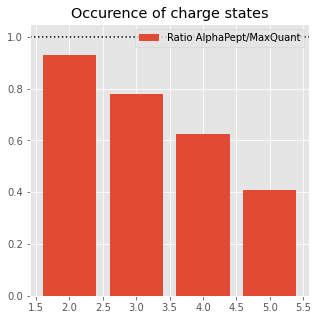

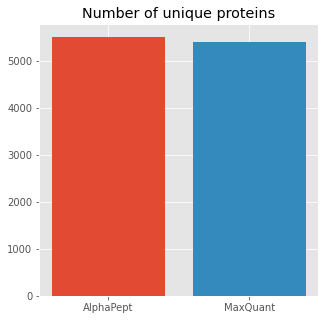

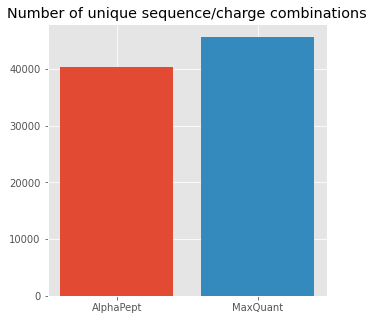

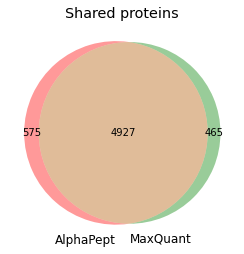

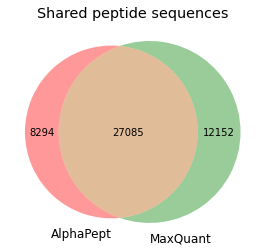

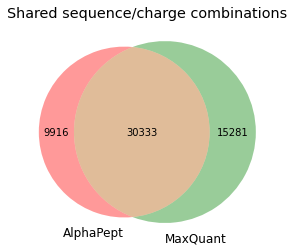

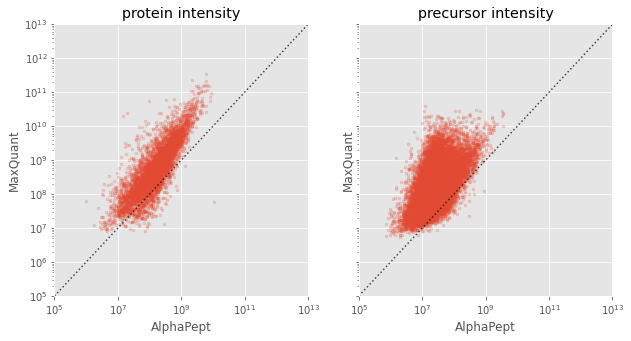

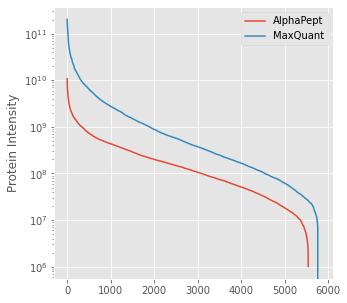

In [3]:
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank

df1, df2 = prepare_files('E:/test_temp/thermo_HeLa.ms_data.hdf', os.path.join(tmp_folder,'thermo_HeLa_evd.txt'))
for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

### Calling custom steps of the pipeline

Work with already processed results and call individual steps

--- ML ---
2021-01-09 12:29:33 INFO - 47,722 target (4,772 decoy) of 56617 PSM. fdr 0.099996 for a cutoff of 19.42 
2021-01-09 12:29:33 INFO - Training & cross-validation on 9993 targets and 9993 decoys
2021-01-09 12:31:08 INFO - The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 250}
2021-01-09 12:31:08 INFO - The train accuracy was 0.9312518763134194
2021-01-09 12:31:08 INFO - Testing on 39973 targets and 39973 decoys
2021-01-09 12:31:09 INFO - The test accuracy was 0.9078252820653941
2021-01-09 12:31:09 INFO - Top features {'y_hits': 0.2756611875604022, 'x_tandem': 0.14206725860494512, 'hits': 0.12001512666224874, 'n_ions': 0.07889030593271515, 'matched_int_ratio': 0.04678016406144238, 'matched_ion_fraction': 0.04405319981640082, 'matched_int': 0.03715340396638434, 'delta_m': 0.02645981834160133, 'n_missed': 0.02330516284341821, 'b_hits': 0.023252100684099816, 'y-NH3_hits': 0.015295046699124383, 'o_mass': 0.01482790653227227, '

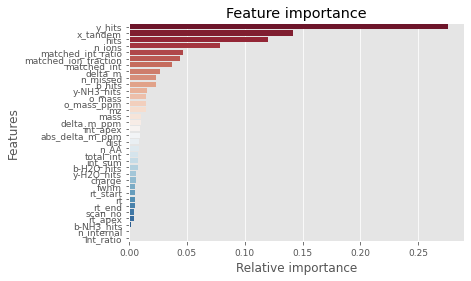

2021-01-09 12:31:09 INFO - Filter df with x_tandem score
2021-01-09 12:31:11 INFO - Global FDR on precursor
2021-01-09 12:31:11 INFO - 40,994 target (409 decoy) of 56569 PSM. fdr 0.009977 for a cutoff of 0.62 


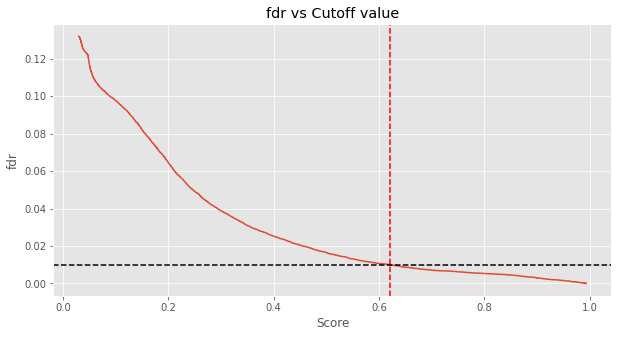

C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


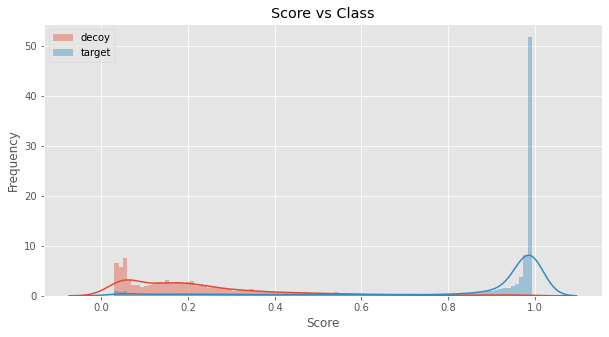

--- x! ---
2021-01-09 12:31:12 INFO - Filter df with x_tandem score
2021-01-09 12:31:12 INFO - Global FDR on precursor
2021-01-09 12:31:12 INFO - Last q_value 0.010 of dataset is smaller than fdr_level 0.010
2021-01-09 12:31:12 INFO - 40,994 target (409 decoy) of 41403 PSM. fdr 0.009977 for a cutoff of 18.72 


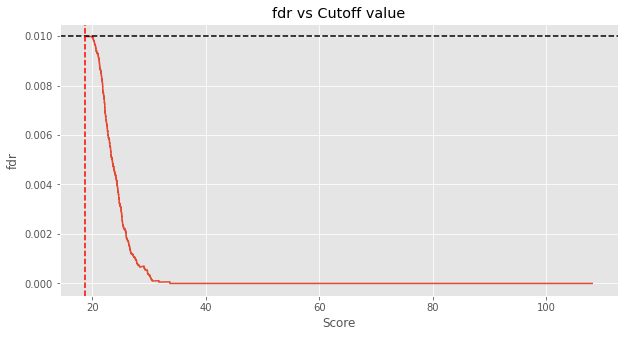

C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


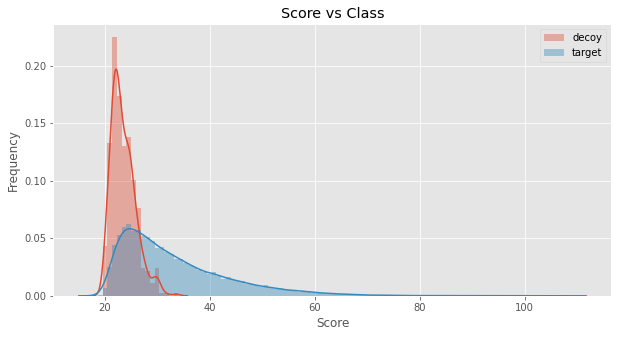

In [4]:
import alphapept.io
from alphapept.score import get_ML_features, filter_with_ML, filter_with_x_tandem, cut_global_fdr, train_RF

ms_file = alphapept.io.MS_Data_File('E:/test_temp/thermo_HeLa.ms_data.hdf')

df = ms_file.read(dataset_name='second_search')
df = get_ML_features(df)

print('--- ML ---')
cv, features = train_RF(df, plot=True)
df = filter_with_ML(df, cv, features = features)
df = cut_global_fdr(df, analyte_level='precursor',  plot=True)

print('--- x! ---')
df = filter_with_x_tandem(df)
df = cut_global_fdr(df, analyte_level='precursor',  plot=True)

### Bruker HeLa

In [5]:
%run -i test_ci.py bruker_hela

['test_ci.py', 'bruker_hela'] 2
2021-01-09 12:31:14 INFO - Creating dir E:/test_temp/.
2021-01-09 12:32:22 INFO - Currently 114.85 GB of memory available.
2021-01-09 12:32:22 INFO - System information: uname_result(system='Windows', node='PCMANN338', release='10', version='10.0.18362', machine='AMD64', processor='Intel64 Family 6 Model 85 Stepping 4, GenuineIntel')
2021-01-09 12:32:22 INFO - AlphaPept version 0.3.9-dev0
2021-01-09 12:32:22 INFO - Python version 3.8.6 | packaged by conda-forge | (default, Nov 27 2020, 18:58:29) [MSC v.1916 64 bit (AMD64)]
2021-01-09 12:32:22 INFO - Numba version 0.51.2
2021-01-09 12:32:22 INFO - Check for settings not completely implemented yet.
2021-01-09 12:32:22 INFO - Checking CPU settings.
2021-01-09 12:32:22 INFO - Setting number of processes to 24.
2021-01-09 12:32:22 INFO - Checking if files exist.
2021-01-09 12:32:22 INFO - Results path was not set. Setting to E:\test_temp\results.hdf
2021-01-09 12:32:22 INFO - Shortnames not set. Setting to fi




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 12:32:24 ERROR - This FASTA entry contains unknown AAs {'X'} - Peptides with unknown AAs will be skipped: 
 {'id': 'Q9GF61', 'name': 'sp|Q9GF61|MATK_ARALP', 'description': 'sp|Q9GF61|MATK_ARALP Maturase K OS=Arabidopsis lyrata subsp. petraea OX=59691 GN=matK PE=3 SV=1', 'sequence': 'MEKFQGYLEFDGARQQSFLYPLFFREYIYVLAYDHGLNRLNRNRSIFLENTDYDKKYSSLIVKRLILRMYEQNRLIIPTKDLNQNSFLGHTSLFYYQMISVLFAVIVEIPFSLRLGSSFQGKQLKKSYNLQSIHSILPFLEDKLAHFNYVLDVLIPYPIHLEILVQILRYWVKDASSLHFFRFCLYEYCNCKNFYIKKKSILNPRFFLFLYNSHVCEYESIFFFLRKRSSHLRSPSYEVLFERIFFYGKIQHFFKVFVNNFPAILGLLKDPFIHYVRYHGRCILATKDTPLLMNKWKYFFVNLWQCYFSVWFQSQKVNINQLSKDNLEFLGYLSSLRLNPLVVRSQMLENSFLIDNVRIKLDSKIPISSIIGSLAKDKFCNVLGHPISKATWTDSSDFDILNRFVRICKNISHYYSGSSKKKNLYRIKYILRLCCVKTLARKXKSTVCAFLKRLGSGLLEEFLTGEDQVLSLIFPRSYYASKRLYRVRIWYLDILYLNDLVNHE'}

2021-01-09 12:32:24 ERROR - This FASTA entry contains unknown AAs {'X'} - Peptides with unknown AAs will be skipped: 
 {'id': 'P80838', 'name': 'sp|P80838|CWP17_ARATH', 'description': 'sp|P80838|CW




  3%|█▋                                                              | 0.02702702702702703/1 [01:08<40:48, 2516.81s/it]


  5%|███▍                                                            | 0.05405405405405406/1 [01:09<28:01, 1778.02s/it]


  8%|█████▏                                                          | 0.08108108108108109/1 [01:10<19:17, 1259.88s/it]


 11%|███████                                                          | 0.10810810810810811/1 [01:12<13:19, 896.80s/it]


 14%|████████▊                                                        | 0.13513513513513514/1 [01:13<09:12, 639.04s/it]


  0%|                                                                                            | 0/1 [05:05<?, ?it/s]



 19%|████████████▍                                                     | 0.1891891891891892/1 [01:15<04:34, 338.91s/it]


 22%|██████████████                                                   | 0.21621621621621623/1 [01:17<03:15, 249.71s/it]


 24%|███████████████

2021-01-09 12:34:37 INFO - Digested 36,789 proteins and generated 8,960,078 spectra
2021-01-09 12:36:35 INFO - Database saved to E:\test_temp\database.hdf. Filesize of database is 4.65 GB



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 12:36:51 INFO - Processing 1 files for step raw_conversion
2021-01-09 12:36:51 INFO - File E:/test_temp/bruker_HeLa has extension .d - converting from Bruker.
2021-01-09 13:14:00 INFO - File conversion complete. Extracted 299728 precursors.
2021-01-09 13:14:07 INFO - File conversion of file E:/test_temp/bruker_HeLa.d complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 13:14:07 INFO - Processing 1 files for step find_features
2021-01-09 13:14:07 INFO - No *.hdf file with features found for E:/test_temp/bruker_HeLa.ms_data.hdf. Adding to feature finding list.
2021-01-09 13:14:08 INFO - Feature finding on E:/test_temp/bruker_HeLa.d
2021-01-09 13:14:08 INFO - Using Windows FF
2021-01-09 13:14:10 INFO - TopLevelUffWorkflow: Initializing 4d Feature Finder Workflow for lc-timstof data
2021-01-09 13:14:10 INFO - bdal.uff.TopLevelUffWorkflow: This is Universal Feature Finder 3.13.1.0
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - bdal.uff.cmdline: Parameters for ParameterSet path '':
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO -  directory containing the data to be processed." , "required":true , "hidden":false , "type":"class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >" , "constraint":null , "value":"E:/test_temp/bruker_HeLa.d"}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - nable lcm

2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - t':
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - ut':
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - ures sqlite output" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - "Parameter for writing raw msms peaks of non-deisotoped peaks if writeAllRawPeaks is false." , "required":false , "hidden":true , "type":"double" , "constraint":null , "value":150}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO -  non-deconvoluted peaks are filled up." , "required":false , "hidden":true , "type":"class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >" , "constraint":"[topN,threshold] (class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >)" , "value":"topN"}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - , all raw peaks are written

2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - erance for matching uncalibrated peaks" , "required":true , "hidden":true , "type":"double" , "constraint":"in [0,1.79769e+308] (double)" , "value":0.05}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO -  tolerance unit" , "required":true , "hidden":true , "type":"class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >" , "constraint":null , "value":"Da"}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - with m/z of reference peaks used for both calibration algorithms" , "required":true , "hidden":true , "type":"class std::vector<class std::vector<double,class std::allocator<double> >,class std::allocator<class std::vector<double,class std::allocator<double> > > >" , "constraint":"be a class std::vector<class std::vector<double,class std::allocator<double> >,class std::allocator<class std::vector<double,class std::allocator<double> > > > with at least one list of at least 2 positive values"

2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - "vector of CCS values of reference peaks for mobility calibration" , "required":false , "hidden":true , "type":"class std::vector<double,class std::allocator<double> >" , "constraint":null , "value":[]}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - c":"vector of vectors with charge values for CCS calibration" , "required":false , "hidden":true , "type":"class std::vector<int,class std::allocator<int> >" , "constraint":null , "value":[]}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - :"vector of mass values of reference peaks for mobility calibration" , "required":false , "hidden":true , "type":"class std::vector<double,class std::allocator<double> >" , "constraint":null , "value":[]}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - ":"mobility tolerance (in relative 1/k0) for finding the reference mobility peaks" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0.1}
2021-01-

2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO -  features for clusters close to MSMS precursors?" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":true}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - "scale FWHM interval by this factor to get feature interval" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":2}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - thod for computation of rt and mobility intervals for isotope clusters (BoundingBox, FWHM)" , "required":false , "hidden":false , "type":"class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >" , "constraint":"[BoundingBox,FWHM] (class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >)" , "value":"BoundingBox"}
2021-01-09 13:14:10 INFO - 
20

2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO -  molecules: isotope patterns are computed for overlapping ranges of this size (a pattern search is done over one range)" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":50}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - ired":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - :"enable parallel processing" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":true}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - r averagine patterns" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":50}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - t isotope clusters which are assigned to MSMS precursors?" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - tec

2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - f true, raw data points are written to result data structure" , "required":false , "hidden":true , "type":"bool" , "constraint":null , "value":false}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - nal representation of clusters: as strings or as rasterized "patches"" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":true}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - tiply with median of mean cluster intensities to derive delta for splitting" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - ctor (analog to clusteringSplitFactor) for splitting of tims clusters" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":1.3}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - ian sigma for mobility smoothing in splitting" , "required":false , "hidden":false , "type":

2021-01-09 13:14:10 INFO - plitting" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO -  length in index rt a cluster must have" , "required":false , "hidden":false , "type":"int" , "constraint":null , "value":5}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - umber of peaks a cluster must have" , "required":true , "hidden":false , "type":"int" , "constraint":null , "value":50}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - minimum number of peaks for clusterSplitting" , "required":false , "hidden":false , "type":"int" , "constraint":null , "value":20}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - ld for deepness of valleys for splitting (min. difference between peak and valley)" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":3}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - actor used for calculating threshold" , "required":f

2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO -  allowed for deconvolution results. 0 = determine automatically " , "required":true , "hidden":false , "type":"int" , "constraint":"in [1,1000] (int)" , "value":4}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO -  allowed for deconvolution results." , "required":false , "hidden":false , "type":"int" , "constraint":"in [1,1000] (int)" , "value":1}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - r acceptable percentage of dip allowed in an isotope envelope shape. Default 0.75" , "required":false , "hidden":false , "type":"double" , "constraint":"in [0,1] (double)" , "value":0.75}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO -  with excluded masses are not used as anchor peaks." , "required":false , "hidden":false , "type":"class std::vector<double,class std::allocator<double> >" , "constraint":null , "value":[]}
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - ks with excluded masses are not used as anchor 

2021-01-09 13:14:10 INFO - referenceMobilityCCSList=[]
2021-01-09 13:14:10 INFO - referenceMobilityChargeList=[]
2021-01-09 13:14:10 INFO - referenceMobilityMassList=[]
2021-01-09 13:14:10 INFO - relativeOneOverK0Tolerance=0.100000
2021-01-09 13:14:10 INFO - resolution=15000.000000
2021-01-09 13:14:10 INFO - rtMaxInSeconds=100000000000.000000
2021-01-09 13:14:10 INFO - rtMaxMobilityCalibrantsInSeconds=100000000000.000000
2021-01-09 13:14:10 INFO - rtMinInSeconds=0.000000
2021-01-09 13:14:10 INFO - rtMinMobilityCalibrantsInSeconds=0.000000
2021-01-09 13:14:10 INFO - ferenceMobilityCCSList=[]
2021-01-09 13:14:10 INFO - danceThreshold=0.000000
2021-01-09 13:14:10 INFO - ionIntervalFactor=0.500000
2021-01-09 13:14:10 INFO - ionNormalization=false
2021-01-09 13:14:10 INFO - ionScale=1.000000
2021-01-09 13:14:10 INFO - y=false
2021-01-09 13:14:10 INFO - cting=true
2021-01-09 13:14:10 INFO - hm=false
2021-01-09 13:14:10 INFO - inFraction=0.600000
2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:1

2021-01-09 13:14:10 INFO - 
2021-01-09 13:14:10 INFO - bdal.io.nupf.InputInfoSource: Opening E:/test_temp/bruker_HeLa.d\analysis.tdf to read io::MsInputInfo.
2021-01-09 13:14:10 INFO - bdal.io.nupf.InputInfoSource: 'bruker_HeLa.d' has 61591 pasef frames and 299728 precursors.
2021-01-09 13:14:10 INFO - bdal.algorithm.LockMassCalibrationSwitch: Lockmass calibration disabled.
2021-01-09 13:14:10 INFO - bdal.uff.MGFOutput: Bruker TimsTOF MGF formatting.
2021-01-09 13:14:10 INFO - id=0x1c14] [INFO ] bdal.io.nupf.InputInfoSource: Opening E:/test_temp/bruker_HeLa.d\analysis.tdf to read io::MsInputInfo.
2021-01-09 13:14:10 INFO - bdal.io.nupf.InputInfoSource: 'bruker_HeLa.d' has 61591 pasef frames and 299728 precursors.
2021-01-09 13:14:10 INFO - dal.nupf_calibration.tims.DecideCalibrationPath: Recalibration enabled for bruker_HeLa.d
2021-01-09 13:14:10 INFO - dal.algorithm.ReadTimsCalibrants: No reference mass lists or lock mass, skipping reference mass exctraction
2021-01-09 13:14:10 INFO -

2021-01-09 13:37:24 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 5.35814% (110001/2052951)
2021-01-09 13:37:26 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 5.84524% (120001/2052951)
2021-01-09 13:37:27 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 6.33235% (130001/2052951)
2021-01-09 13:37:28 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 6.81945% (140001/2052951)
2021-01-09 13:37:29 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 7.30656% (150001/2052951)
2021-01-09 13:37:30 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 7.79366% (160001/2052951)
2021-01-09 13:37:31 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 8.28076% (170001/2052951)
2021-01-09 13:37:33 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 8.76787% (180001/2052951)
2021-01-09 13:37:34 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 9.25497% (190001/2052951)
2021-01-09 13:37:35 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 9.7420

2021-01-09 13:38:47 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 44.8135% (920001/2052951)
2021-01-09 13:38:48 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 45.3006% (930001/2052951)
2021-01-09 13:38:49 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 45.7877% (940001/2052951)
2021-01-09 13:38:50 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 46.2749% (950001/2052951)
2021-01-09 13:38:51 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 46.762% (960001/2052951)
2021-01-09 13:38:52 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 47.2491% (970001/2052951)
2021-01-09 13:38:52 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 47.7362% (980001/2052951)
2021-01-09 13:38:53 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 48.2233% (990001/2052951)
2021-01-09 13:38:54 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 48.7104% (1000001/2052951)
2021-01-09 13:38:55 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 49.197

2021-01-09 13:39:46 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 83.7818% (1720001/2052951)
2021-01-09 13:39:47 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 84.2689% (1730001/2052951)
2021-01-09 13:39:47 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 84.756% (1740001/2052951)
2021-01-09 13:39:48 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 85.2431% (1750001/2052951)
2021-01-09 13:39:48 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 85.7302% (1760001/2052951)
2021-01-09 13:39:49 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 86.2174% (1770001/2052951)
2021-01-09 13:39:50 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 86.7045% (1780001/2052951)
2021-01-09 13:39:50 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 87.1916% (1790001/2052951)
2021-01-09 13:39:51 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress: 87.6787% (1800001/2052951)
2021-01-09 13:39:52 INFO - bdal.algorithm.LcmsClusterDeisotoping: Progress



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 14:18:07 INFO - Processing 1 files for step search_db


100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:45:57<00:00, 6357.67s/it]
  0%|                                                                                          | 0/1 [1:04:12<?, ?it/s]


2021-01-09 14:18:28 INFO - Calibrating fragments


C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2021-01-09 14:18:55 INFO - Performing search on 348,181 query and 8,960,078 db entries with m_tol = 20.00 and m_offset = 20.00.
2021-01-09 14:19:45 INFO - Compared 255,824,304 spectra and found 200,221 psms.
2021-01-09 14:19:45 INFO - Extracting columns for scoring.
2021-01-09 14:20:14 INFO - Extracted columns from 200,221 spectra.
2021-01-09 14:20:14 INFO - Saving first_search results to E:/test_temp/bruker_HeLa.ms_data.hdf
2021-01-09 14:20:15 INFO - Search of file E:/test_temp/bruker_HeLa.d complete.
2021-01-09 14:20:39 INFO - First search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 14:20:39 INFO - Processing 1 files for step calibrate_hdf
2021-01-09 14:20:40 INFO - Scoring using X-Tandem
2021-01-09 14:20:40 INFO - 53,635 target (536 decoy) of 70593 PSM. fdr 0.009993 for a cutoff of 16.23 
2021-01-09 14:20:45 INFO - Calibration of file E:/test_temp/bruker_HeLa.ms_data.hdf complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 14:20:45 INFO - Processing 1 files for step search_db
2021-01-09 14:20:45 INFO - Found calibrated m_offset with value 5.93


  0%|                                                                                            | 0/1 [02:48<?, ?it/s]


2021-01-09 14:21:09 INFO - Performing search on 348,181 query and 8,960,078 db entries with m_tol = 20.00 and m_offset = 5.93.
2021-01-09 14:21:26 INFO - Compared 88,729,092 spectra and found 168,503 psms.
2021-01-09 14:21:26 INFO - Extracting columns for scoring.
2021-01-09 14:21:46 INFO - Extracted columns from 168,503 spectra.
2021-01-09 14:21:46 INFO - Saving second_search results to E:/test_temp/bruker_HeLa.ms_data.hdf
2021-01-09 14:21:47 INFO - Search of file E:/test_temp/bruker_HeLa.d complete.
2021-01-09 14:22:10 INFO - Second search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 14:22:11 INFO - Processing 1 files for step score_hdf
2021-01-09 14:22:11 INFO - Found second search psms for scoring.
2021-01-09 14:22:14 INFO - Last q_value 0.036 of dataset is smaller than fdr_level 0.100
2021-01-09 14:22:14 INFO - 72,373 target (2,640 decoy) of 75013 PSM. fdr 0.036478 for a cutoff of 10.58 
2021-01-09 14:22:14 INFO - The total number of available decoys is lower than the initial set of high scoring targets.
2021-01-09 14:22:14 INFO - Training & cross-validation on 4238 targets and 4237 decoys
2021-01-09 14:22:57 INFO - The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 250}
2021-01-09 14:22:57 INFO - The train accuracy was 0.9798230088495575
2021-01-09 14:22:57 INFO - Testing on 16950 targets and 16951 decoys
2021-01-09 14:22:57 INFO - The test accuracy was 0.9490870475797174
2021-01-09 14:22:57 INFO - Top features {'y_hits': 0.21300402656143316, 'hits': 0.17060509615621747, 'x_tandem': 0.0923823358



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 14:23:05 INFO - A total of 7,023 proteins with unique PSMs found
2021-01-09 14:23:05 INFO - A total of 859 ambigious proteins
2021-01-09 14:23:34 INFO - A total of 617 proteins with unique PSMs found
2021-01-09 14:23:34 INFO - A total of 29 ambigious proteins
2021-01-09 14:23:34 INFO - Global FDR on protein
2021-01-09 14:23:34 INFO - 6,662 target (66 decoy) of 7790 PSM. fdr 0.009907 for a cutoff of 0.60 
2021-01-09 14:23:35 INFO - FDR on proteins complete. For 0.01 FDR found 65,485 targets and 69 decoys. A total of 6,709 proteins found.
2021-01-09 14:23:35 INFO - Extracting ions
2021-01-09 14:23:54 INFO - Extracting ions complete.
2021-01-09 14:24:05 INFO - Saving complete.
2021-01-09 14:24:05 INFO - Protein groups complete.
2021-01-09 14:24:05 INFO - Only 1 dataset present. Skipping alignment.
2021-01-09 14:24:05 INFO - Assembling dataframe.
2021-01-09 14:24:06 INFO - Assembly complete.
2021-01-09 14:24:07 INFO - Complete. 
2021-01-09 14:24:07 INFO - Starting profile extrac




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 14:24:07 INFO - LFQ complete.
2021-01-09 14:24:07 INFO - Exporting as csv.
2021-01-09 14:24:18 INFO - Settings saved to E:\test_temp\results.yaml
2021-01-09 14:24:18 INFO - Analysis complete.


F:\installer_test\alphapept\test_helper.py:13: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  df1 = [pd.DataFrame(np.array(h5py.File(path1)['protein_fdr'][_])) for _ in h5py.File(path1)['protein_fdr'].keys()]
F:\installer_test\alphapept\test_helper.py:15: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  df1.columns = h5py.File(path1)['protein_fdr'].keys()
C:\ProgramData\Anaconda3\envs\al

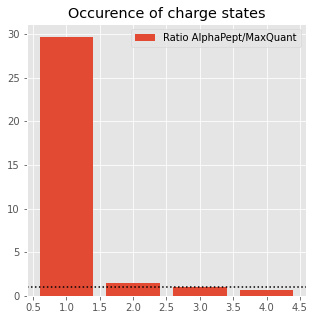

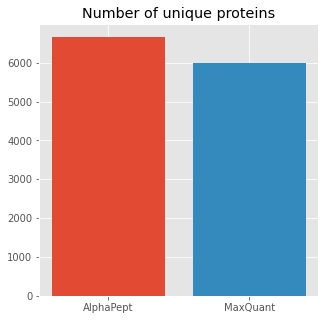

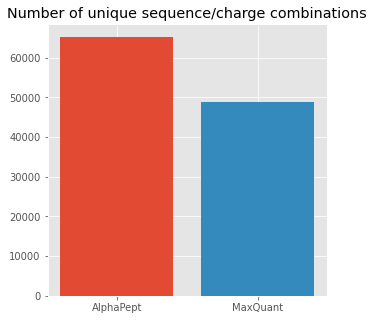

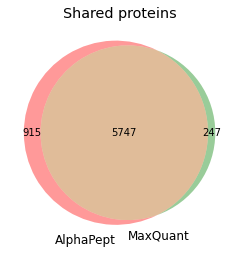

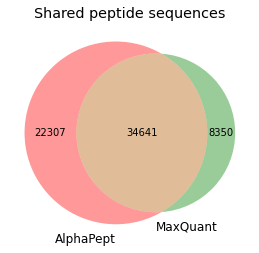

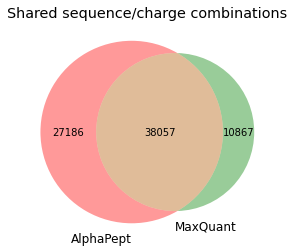

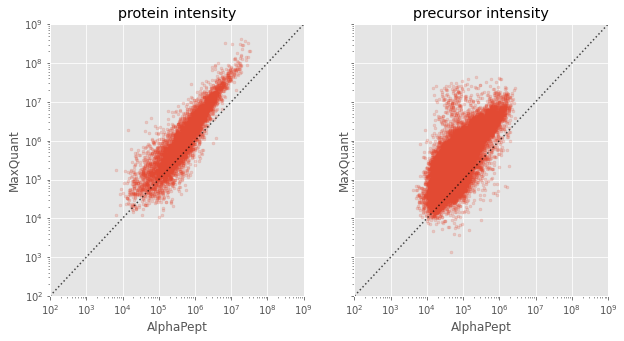

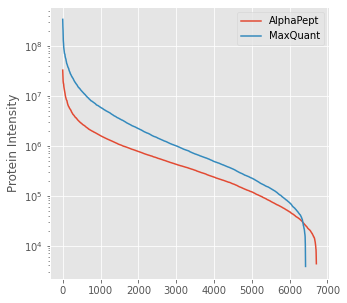

In [6]:
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank

df1, df2 = prepare_files('E:/test_temp/bruker_HeLa.ms_data.hdf', os.path.join(tmp_folder,'bruker_HeLa_evd.txt'))
for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

# Quantification Test

This notebook will run `PXD006109` and `PXD010012` and compare the quantificaiton performance.

## PXD006109

In [7]:
%run -i test_ci.py PXD006109

['test_ci.py', 'PXD006109'] 2
2021-01-09 14:24:25 INFO - Creating dir E:/test_temp/.
2021-01-09 14:26:19 INFO - Currently 117.53 GB of memory available.
2021-01-09 14:26:19 INFO - System information: uname_result(system='Windows', node='PCMANN338', release='10', version='10.0.18362', machine='AMD64', processor='Intel64 Family 6 Model 85 Stepping 4, GenuineIntel')
2021-01-09 14:26:19 INFO - AlphaPept version 0.3.9-dev0
2021-01-09 14:26:19 INFO - Python version 3.8.6 | packaged by conda-forge | (default, Nov 27 2020, 18:58:29) [MSC v.1916 64 bit (AMD64)]
2021-01-09 14:26:19 INFO - Numba version 0.51.2
2021-01-09 14:26:19 INFO - Check for settings not completely implemented yet.
2021-01-09 14:26:19 INFO - Checking CPU settings.
2021-01-09 14:26:19 INFO - Setting number of processes to 24.
2021-01-09 14:26:19 INFO - Checking if files exist.
2021-01-09 14:26:20 INFO - Results path was not set. Setting to E:\test_temp\results.hdf
2021-01-09 14:26:20 INFO - Shortnames not set. Setting to file




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 14:26:21 ERROR - This FASTA entry contains unknown AAs {'X'} - Peptides with unknown AAs will be skipped: 
 {'id': 'Q8FHF4', 'name': 'sp|Q8FHF4|HIPA_ECOL6', 'description': 'sp|Q8FHF4|HIPA_ECOL6 Serine/threonine-protein kinase toxin HipA OS=Escherichia coli O6:H1 (strain CFT073 / ATCC 700928 / UPEC) OX=199310 GN=hipA PE=3 SV=2', 'sequence': 'MPKLVTWMNNQRVGELTKLANGAHTFKYAPEWLASRYARPLSLSLPLQRGNITSDAVFNFFDNLLPDSPIVRDRIVKRYHAKSRQPFDLLSEIGRDSVGAVTLIPEDETVTCPIMAWEKLTEARLEEVLTAYKADIPLGMIREENDFRISVAGAQEKTALLRIGNDWCIPKGITPTTHIIKLPIGEIRQPNATLDLSQSVDNEYYCLLLAKELGLNVPDAEIIKAGRVRALAVKRFDRRWNTERTVLLRLPQEDMCQTFGLPSSVKYESDGGPGIAQIMAFLMGSSEALKDRYDFMKFQVFQWLIGATDGHAKNFSVFIQAGGSYRLTPFYDIISAFPVLGGTGIHISDLKLAMGLNASKGKKTAIDKXYPRHFXATAKVLKFPEVXMHEILXDFARMIPAALDNVKNSLPXDFPEXVVTAVETNVLRLHGRLSPEYXXK'}

2021-01-09 14:26:21 ERROR - This FASTA entry contains unknown AAs {'X'} - Peptides with unknown AAs will be skipped: 
 {'id': 'P75901', 'name': 'sp|P75901|EFEU_ECOLI', 'description': 'sp|P75901|EFEU_ECO

2021-01-09 14:26:21 ERROR - This FASTA entry contains unknown AAs {'X'} - Peptides with unknown AAs will be skipped: 
 {'id': 'P20860', 'name': 'sp|P20860|FMF1_ECOLX', 'description': 'sp|P20860|FMF1_ECOLX F7-1 fimbrial protein (Fragment) OS=Escherichia coli OX=562 PE=1 SV=1', 'sequence': 'XNNIVFYSLGNVNSYQGG'}

2021-01-09 14:26:21 ERROR - This FASTA entry contains unknown AAs {'X', 'Z'} - Peptides with unknown AAs will be skipped: 
 {'id': 'Q8X482', 'name': 'sp|Q8X482|ESPFU_ECO57', 'description': 'sp|Q8X482|ESPFU_ECO57 Secreted effector protein EspF(U) OS=Escherichia coli O157:H7 OX=83334 GN=espF(U) PE=1 SV=1', 'sequence': 'MINNVSSLFPTVNRNITAVYKKSSFSVSPQKITLNPVKISSPFSPSSSSISATTLFRAPNAHSASFHRQSTAESSLHQQLPNVRQRLIQHLAEHGIXPARSMAEHIPPAPKWPAPPPPVQNEQSRPLPDVAQRLMQHLAEHGIQPARNMAEHIPPAPNWPAPTPPVQNEQSRPLPDVAQRLMQHLAEHGIQPARNMAEHIPPAPXWXAPTPPVQNEQSRPLPDVAQRLMQHLAEHGIZPARSMAEHIPPAPNWPAPPPPVQNEQSRPLPDVAQRLXQHLAEHGIQPARNMAEHIPPAPNWPAPXXPVXNEQSRPLXDVAXRLMQHLAEHGIQPARNMAEHIPPAPNWXAPTPPVQNEQSRPLPDVAQRL

2021-01-09 14:26:21 ERROR - This FASTA entry contains unknown AAs {'X'} - Peptides with unknown AAs will be skipped: 
 {'id': 'Q8FF08', 'name': 'sp|Q8FF08|UNG_ECOL6', 'description': 'sp|Q8FF08|UNG_ECOL6 Uracil-DNA glycosylase OS=Escherichia coli O6:H1 (strain CFT073 / ATCC 700928 / UPEC) OX=199310 GN=ung PE=3 SV=3', 'sequence': 'MANELTWHDVLAEEKQQPYFLNTLQTVASERQSGVTIYPPQKDVFNAFRFTELGDVKVVILGQDPYHGPGQAHGLAFSVRPGIATPPSLLNMYKELENTIPGFTRPNHGYLESWARQGVLLLNTVLTVRAGQAHSHASLGWETFTDKVISLINQHREGVVFLLWGSHAQKKGAIIDXQRHHVLKAPHPSPLSAHRGFFGCNHFVLANQWLEQRGETPIDWMPVLPAES'}

2021-01-09 14:26:21 ERROR - This FASTA entry contains unknown AAs {'X'} - Peptides with unknown AAs will be skipped: 
 {'id': 'P76000', 'name': 'sp|P76000|YCGI_ECOLI', 'description': 'sp|P76000|YCGI_ECOLI Putative uncharacterized protein YcgI OS=Escherichia coli (strain K12) OX=83333 GN=ycgI PE=5 SV=2', 'sequence': 'MNTIHLRCLFRMNPLVWCLRADVAAELRSLRRYYHLSNGMESKSVDTRSIYRELGATLSYNMRLGNGMEXEPWLKAAVRKEFVDDNRVKVNNDGNFVNDLSGRRGIYQAAIKASFSSTF




  2%|█▍                                                             | 0.022727272727272728/1 [00:46<33:14, 2040.92s/it]


  5%|██▊                                                            | 0.045454545454545456/1 [00:47<22:51, 1436.80s/it]


  7%|████▎                                                           | 0.06818181818181818/1 [00:48<15:56, 1026.99s/it]


  9%|█████▉                                                           | 0.09090909090909091/1 [00:54<12:02, 794.98s/it]


 11%|███████▍                                                         | 0.11363636363636363/1 [01:05<10:21, 701.22s/it]


 14%|████████▊                                                        | 0.13636363636363635/1 [01:05<07:11, 499.29s/it]


 16%|██████████▌                                                       | 0.1590909090909091/1 [01:07<05:10, 369.03s/it]


 18%|███████████▊                                                     | 0.18181818181818182/1 [01:08<03:39, 267.87s/it]


 20%|█████████████▎  

2021-01-09 14:28:14 INFO - Digested 43,752 proteins and generated 6,062,444 spectra
2021-01-09 14:29:36 INFO - Database saved to E:\test_temp\database.hdf. Filesize of database is 3.17 GB



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 14:29:46 INFO - Processing 6 files for step raw_conversion


67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [01:32<02:09, 389.52s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 14:31:19 INFO - Processing 6 files for step find_features
2021-01-09 14:31:19 INFO - Setting Process limit to 14



 17%|██████████▎                                                   | 0.16666666666666666/1 [12:09<1:00:48, 4377.77s/it]
 33%|█████████████████████▋                                           | 0.3333333333333333/1 [12:10<34:03, 3065.87s/it]
 50%|████████████████████████████████████████                                        | 0.5/1 [12:14<17:56, 2153.71s/it]
 67%|███████████████████████████████████████████▎                     | 0.6666666666666666/1 [12:17<08:24, 1513.53s/it]

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 14:43:37 INFO - Processing 6 files for step search_db




 17%|██████████▊                                                      | 0.16666666666666666/1 [01:22<06:51, 493.80s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [15:21<00:00, 921.51s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [13:48<00:00, 828.33s/it]
100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [18:51<00:00, 1131.67s/it]


2021-01-09 14:45:20 INFO - First search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 14:45:21 INFO - Processing 6 files for step calibrate_hdf


17%|███████████                                                       | 0.16666666666666666/1 [00:12<01:04, 77.30s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 14:45:34 INFO - Processing 6 files for step search_db



 17%|██████████▊                                                      | 0.16666666666666666/1 [00:52<04:23, 315.76s/it]
100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:10<00:00, 70.61s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:58<00:00, 178.97s/it]


2021-01-09 14:46:44 INFO - Second search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 14:46:45 INFO - Processing 6 files for step score_hdf


67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [00:36<00:48, 145.36s/it]

2021-01-09 14:47:21 INFO - Extracting protein groups.




100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:45<00:00, 45.80s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [02:13<00:00, 133.48s/it]


 17%|██████████▊                                                      | 0.16666666666666666/1 [01:10<05:51, 421.34s/it]

 33%|██████████████████████                                            | 0.3333333333333333/1 [01:16<03:23, 305.84s/it]

 50%|████████████████████████████████████████▌                                        | 0.5/1 [01:23<01:53, 227.10s/it]

 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [01:44<01:05, 196.94s/it]

 83%|███████████████████████████████████████████████████████           | 0.8333333333333334/1 [01:50<00:24, 148.32s/it]

100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:56<00:00, 114.72s/it]

2021-01-09 14:49:19 INFO - Protein groups complete.
2021-01-09 14:49:27 INFO - Total deviation before calibration {'mz': 0.006248498335066403, 'rt': 7.795945417390427}
2021-01-09 14:49:27 INFO - Mean deviation before calibration {'mz': 0.00041656655567109355, 'rt': 0.5197296944926951}
2021-01-09 14:49:27 INFO - Solving equation system
2021-01-09 14:49:27 INFO - Regression socre is 0.9103242443327244
2021-01-09 14:49:27 INFO - Solving equation system complete.
2021-01-09 14:49:27 INFO - Applying offset
2021-01-09 14:49:27 INFO - Saving E:/test_temp/PXD006109_HeLa12_1.ms_data.hdf - protein_fdr.
2021-01-09 14:49:28 INFO - Saving E:/test_temp/PXD006109_HeLa12_1.ms_data.hdf - feature_table.
2021-01-09 14:49:28 INFO - Saving E:/test_temp/PXD006109_HeLa12_2.ms_data.hdf - protein_fdr.
2021-01-09 14:49:28 INFO - Saving E:/test_temp/PXD006109_HeLa12_2.ms_data.hdf - feature_table.
2021-01-09 14:49:29 INFO - Saving E:/test_temp/PXD006109_HeLa12_3.ms_data.hdf - protein_fdr.
2021-01-09 14:49:29 INFO

100%|█████████████████████████████████████████████████████████████████▉| 0.9997207483943032/1 [07:41<00:00, 451.99s/it]

2021-01-09 14:57:29 INFO - LFQ complete.
2021-01-09 14:57:29 INFO - Exporting as csv.
2021-01-09 14:57:56 INFO - Settings saved to E:\test_temp\results.yaml
2021-01-09 14:57:56 INFO - Analysis complete.


ValueError: too many values to unpack (expected 2)

C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (120,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_

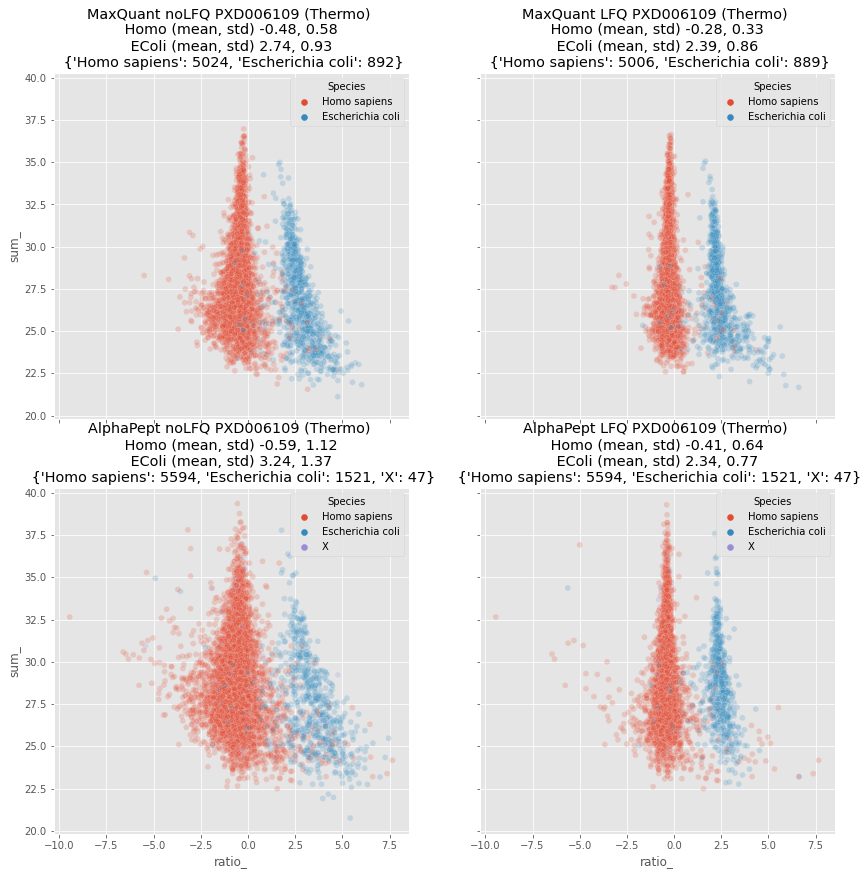

In [9]:
from test_helper import get_plot_df
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD006109_ref.txt'), sep='\t') 
ref['Species'] = ref['Species'].replace(np.nan, "X")

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Shotgun_02-01_{i}" for i in range(1,4)]
    ratio_columns = [f"{x}ntensity Shotgun_12-01_{i}" for i in range(1,4)]

    id_ = 'MaxQuant ' +_+' PXD006109 (Thermo)'
    get_plot_df(ref, base_columns, ratio_columns, axes[0,j], id_)


path = 'E:/test_temp/results.hdf' #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')

species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD006109_HeLa2_{i}{x}" for i in range(1,4)]
    ratio_columns = [f"PXD006109_HeLa12_{i}{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD006109 (Thermo)'
    get_plot_df(ref, base_columns, ratio_columns, axes[1,j], id_)

plt.show()

## Algorithm Test

Test performance of LFQ algorithm on MaxQuant evidence file.

C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (52,53,61) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (120,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\scipy\optimize\slsqp.py:63: RuntimeWarning: invalid value encountered in subtract
  jac[i] = (func(*((x0+dx,)+args)) - f0)/epsilon
C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\scipy\optimize\slsqp.py:63: RuntimeWarning: invalid value encountered in subtract
  jac[i] = (func(*((x0+dx,)+args)) - f0)/epsilon


C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


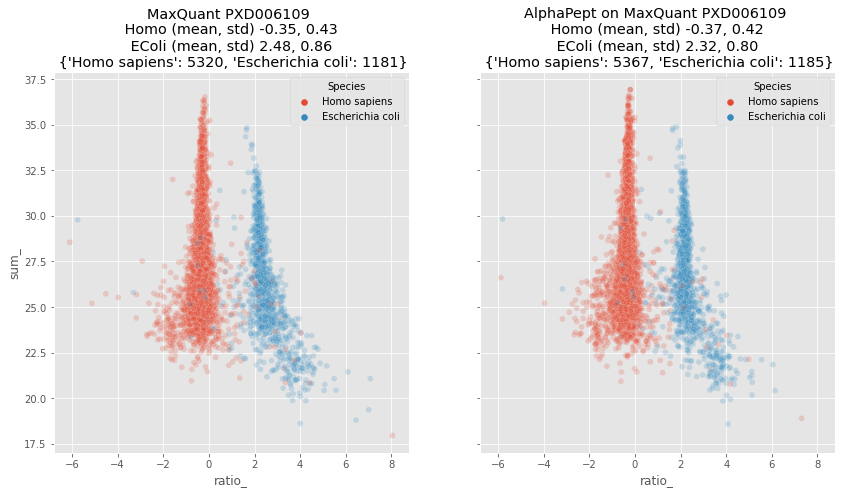

In [10]:
from test_helper import algorithm_test

evd = pd.read_csv(os.path.join(tmp_folder,'PXD006109_ref_evd.txt'), sep='\t') 
ref = pd.read_csv(os.path.join(tmp_folder,'PXD006109_ref.txt'), sep='\t') 

all_columns = [_ for _ in ref.columns if 'LFQ intensity ' in _]

base_columns = [_ for _ in all_columns if '_02' in _]
ratio_columns = [_ for _ in all_columns if '_12' in _]

experiments = evd['Raw file'].unique().tolist()

base_columns2 = [_ for _ in experiments if 'HeLa2' in _]
ratio_columns2 = [_ for _ in experiments if 'HeLa12' in _]

test_id = 'PXD006109'

algorithm_test(evd, ref, base_columns, ratio_columns, base_columns2, ratio_columns2, test_id, software_1, software_2)

## PXD010012

In [11]:
%run -i test_ci.py PXD010012

['test_ci.py', 'PXD010012'] 2
2021-01-09 14:59:14 INFO - Creating dir E:/test_temp/.
2021-01-09 15:24:58 INFO - Currently 113.21 GB of memory available.
2021-01-09 15:24:58 INFO - System information: uname_result(system='Windows', node='PCMANN338', release='10', version='10.0.18362', machine='AMD64', processor='Intel64 Family 6 Model 85 Stepping 4, GenuineIntel')
2021-01-09 15:24:58 INFO - AlphaPept version 0.3.9-dev0
2021-01-09 15:24:58 INFO - Python version 3.8.6 | packaged by conda-forge | (default, Nov 27 2020, 18:58:29) [MSC v.1916 64 bit (AMD64)]
2021-01-09 15:24:58 INFO - Numba version 0.51.2
2021-01-09 15:24:58 INFO - Check for settings not completely implemented yet.
2021-01-09 15:24:58 INFO - Checking CPU settings.
2021-01-09 15:24:58 INFO - Setting number of processes to 24.
2021-01-09 15:24:58 INFO - Checking if files exist.
2021-01-09 15:24:58 INFO - Results path was not set. Setting to E:\test_temp\results.hdf
2021-01-09 15:24:58 INFO - Shortnames not set. Setting to file


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 15:24:58 ERROR - This FASTA entry contains unknown AAs {'X'} - Peptides with unknown AAs will be skipped: 
 {'id': 'Q8FHF4', 'name': 'sp|Q8FHF4|HIPA_ECOL6', 'description': 'sp|Q8FHF4|HIPA_ECOL6 Serine/threonine-protein kinase toxin HipA OS=Escherichia coli O6:H1 (strain CFT073 / ATCC 700928 / UPEC) OX=199310 GN=hipA PE=3 SV=2', 'sequence': 'MPKLVTWMNNQRVGELTKLANGAHTFKYAPEWLASRYARPLSLSLPLQRGNITSDAVFNFFDNLLPDSPIVRDRIVKRYHAKSRQPFDLLSEIGRDSVGAVTLIPEDETVTCPIMAWEKLTEARLEEVLTAYKADIPLGMIREENDFRISVAGAQEKTALLRIGNDWCIPKGITPTTHIIKLPIGEIRQPNATLDLSQSVDNEYYCLLLAKELGLNVPDAEIIKAGRVRALAVKRFDRRWNTERTVLLRLPQEDMCQTFGLPSSVKYESDGGPGIAQIMAFLMGSSEALKDRYDFMKFQVFQWLIGATDGHAKNFSVFIQAGGSYRLTPFYDIISAFPVLGGTGIHISDLKLAMGLNASKGKKTAIDKXYPRHFXATAKVLKFPEVXMHEILXDFARMIPAALDNVKNSLPXDFPEXVVTAVETNVLRLHGRLSPEYXXK'}

2021-01-09 15:24:58 ERROR - This FASTA entry contains unknown AAs {'X'} - Peptides with unknown AAs will be skipped: 
 {'id': 'P75901', 'name': 'sp|P75901|EFEU_ECOLI', 'description': 'sp|P75901|EFEU_ECO

2021-01-09 15:24:59 ERROR - This FASTA entry contains unknown AAs {'X'} - Peptides with unknown AAs will be skipped: 
 {'id': 'P20860', 'name': 'sp|P20860|FMF1_ECOLX', 'description': 'sp|P20860|FMF1_ECOLX F7-1 fimbrial protein (Fragment) OS=Escherichia coli OX=562 PE=1 SV=1', 'sequence': 'XNNIVFYSLGNVNSYQGG'}

2021-01-09 15:24:59 ERROR - This FASTA entry contains unknown AAs {'X', 'Z'} - Peptides with unknown AAs will be skipped: 
 {'id': 'Q8X482', 'name': 'sp|Q8X482|ESPFU_ECO57', 'description': 'sp|Q8X482|ESPFU_ECO57 Secreted effector protein EspF(U) OS=Escherichia coli O157:H7 OX=83334 GN=espF(U) PE=1 SV=1', 'sequence': 'MINNVSSLFPTVNRNITAVYKKSSFSVSPQKITLNPVKISSPFSPSSSSISATTLFRAPNAHSASFHRQSTAESSLHQQLPNVRQRLIQHLAEHGIXPARSMAEHIPPAPKWPAPPPPVQNEQSRPLPDVAQRLMQHLAEHGIQPARNMAEHIPPAPNWPAPTPPVQNEQSRPLPDVAQRLMQHLAEHGIQPARNMAEHIPPAPXWXAPTPPVQNEQSRPLPDVAQRLMQHLAEHGIZPARSMAEHIPPAPNWPAPPPPVQNEQSRPLPDVAQRLXQHLAEHGIQPARNMAEHIPPAPNWPAPXXPVXNEQSRPLXDVAXRLMQHLAEHGIQPARNMAEHIPPAPNWXAPTPPVQNEQSRPLPDVAQRL

2021-01-09 15:24:59 ERROR - This FASTA entry contains unknown AAs {'X'} - Peptides with unknown AAs will be skipped: 
 {'id': 'Q8FF08', 'name': 'sp|Q8FF08|UNG_ECOL6', 'description': 'sp|Q8FF08|UNG_ECOL6 Uracil-DNA glycosylase OS=Escherichia coli O6:H1 (strain CFT073 / ATCC 700928 / UPEC) OX=199310 GN=ung PE=3 SV=3', 'sequence': 'MANELTWHDVLAEEKQQPYFLNTLQTVASERQSGVTIYPPQKDVFNAFRFTELGDVKVVILGQDPYHGPGQAHGLAFSVRPGIATPPSLLNMYKELENTIPGFTRPNHGYLESWARQGVLLLNTVLTVRAGQAHSHASLGWETFTDKVISLINQHREGVVFLLWGSHAQKKGAIIDXQRHHVLKAPHPSPLSAHRGFFGCNHFVLANQWLEQRGETPIDWMPVLPAES'}

2021-01-09 15:24:59 ERROR - This FASTA entry contains unknown AAs {'X'} - Peptides with unknown AAs will be skipped: 
 {'id': 'P76000', 'name': 'sp|P76000|YCGI_ECOLI', 'description': 'sp|P76000|YCGI_ECOLI Putative uncharacterized protein YcgI OS=Escherichia coli (strain K12) OX=83333 GN=ycgI PE=5 SV=2', 'sequence': 'MNTIHLRCLFRMNPLVWCLRADVAAELRSLRRYYHLSNGMESKSVDTRSIYRELGATLSYNMRLGNGMEXEPWLKAAVRKEFVDDNRVKVNNDGNFVNDLSGRRGIYQAAIKASFSSTF


  2%|█▍                                                             | 0.022727272727272728/1 [00:46<33:39, 2066.72s/it]
  5%|██▊                                                            | 0.045454545454545456/1 [00:48<23:16, 1463.12s/it]
  7%|████▎                                                           | 0.06818181818181818/1 [00:49<16:14, 1045.63s/it]
  9%|█████▉                                                           | 0.09090909090909091/1 [00:55<12:14, 807.67s/it]
 11%|███████▍                                                         | 0.11363636363636363/1 [01:05<10:16, 695.66s/it]
100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [38:44<00:00, 2324.76s/it]
100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [36:22<00:00, 2182.98s/it]

 16%|██████████▌                                                       | 0.1590909090909091/1 [01:08<05:17, 377.56s/it]
 18%|███████████▊                     

2021-01-09 15:26:55 INFO - Digested 43,752 proteins and generated 6,062,444 spectra
2021-01-09 15:28:15 INFO - Database saved to E:\test_temp\database.hdf. Filesize of database is 3.17 GB



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 15:28:25 INFO - Processing 10 files for step raw_conversion


10%|███████▎                                                                 | 0.1/1 [3:08:34<28:17:08, 113142.76s/it]

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 18:36:59 INFO - Processing 10 files for step find_features
2021-01-09 18:36:59 INFO - Using Bruker Feature Finder. Setting Process limit to 4




 10%|███████▋                                                                     | 0.1/1 [45:19<6:47:51, 27190.06s/it]

 50%|█████████████████████████████████████▌                                     | 0.5/1 [1:29:20<2:55:06, 21013.80s/it]

 60%|█████████████████████████████████████████████                              | 0.6/1 [1:29:47<1:38:37, 14793.39s/it]

 70%|█████████████████████████████████████████████████████▉                       | 0.7/1 [1:30:37<52:31, 10503.65s/it]

 80%|██████████████████████████████████████████████████████████████▍               | 0.8/1 [1:31:56<25:18, 7590.97s/it]

 90%|█████████████████████████████████████████████████████████████████████▎       | 0.9/1 [2:07:13<19:26, 11662.89s/it]

100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [2:07:41<00:00, 8249.43s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 20:44:41 INFO - Processing 10 files for step search_db





 10%|████████                                                                        | 0.1/1 [06:18<56:47, 3785.79s/it]


 20%|████████████████                                                                | 0.2/1 [06:38<36:07, 2709.21s/it]


100%|█████████████████████████████████████████████████████████████████████████████| 1.0/1 [5:23:25<00:00, 19405.81s/it]
100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [2:14:51<00:00, 8091.45s/it]
100%|█████████████████████████████████████████████████████████████████████████████| 1.0/1 [5:27:06<00:00, 19626.25s/it]


2021-01-09 20:52:14 INFO - First search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 20:52:14 INFO - Processing 10 files for step calibrate_hdf


100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [00:19<00:00, 65.52s/it]
  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 20:52:34 INFO - Processing 10 files for step search_db



 10%|████████                                                                        | 0.1/1 [03:03<27:33, 1837.48s/it]
 20%|████████████████                                                                | 0.2/1 [03:08<17:20, 1300.44s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [03:34<00:00, 214.23s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [11:13<00:00, 673.03s/it]


2021-01-09 20:56:02 INFO - Second search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-01-09 20:56:03 INFO - Processing 10 files for step score_hdf


80%|█████████████████████████████████████████████████████████████████▌                | 0.8/1 [01:13<00:18, 91.25s/it]

2021-01-09 20:57:17 INFO - Extracting protein groups.




100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [01:24<00:00, 84.72s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [05:09<00:00, 309.22s/it]


 10%|████████                                                                        | 0.1/1 [01:53<16:59, 1132.24s/it]

 20%|████████████████▏                                                                | 0.2/1 [02:01<10:55, 818.82s/it]

 30%|████████████████████████▎                                                        | 0.3/1 [02:14<07:06, 609.41s/it]

 40%|████████████████████████████████▍                                                | 0.4/1 [02:20<04:27, 445.52s/it]

 50%|████████████████████████████████████████▌                                        | 0.5/1 [02:25<02:43, 327.38s/it]

 60%|████████████████████████████████████████████████▌                                | 0.6/1 [02:31<01:38, 246.26s/it]

 70%|█████████████████████████

2021-01-09 21:00:07 INFO - Protein groups complete.
2021-01-09 21:00:08 INFO - Also using mobility for calibration.
2021-01-09 21:00:46 INFO - Total deviation before calibration {'mz': 0.002082411419788509, 'rt': 3.373154830454366, 'mobility': 0.05177099728483048}
2021-01-09 21:00:46 INFO - Mean deviation before calibration {'mz': 4.627580932863353e-05, 'rt': 0.07495899623231925, 'mobility': 0.0011504666063295661}
2021-01-09 21:00:46 INFO - Solving equation system
2021-01-09 21:00:46 INFO - Regression socre is 0.9292391192209045
2021-01-09 21:00:46 INFO - Solving equation system complete.
2021-01-09 21:00:46 INFO - Applying offset
2021-01-09 21:00:47 INFO - Saving E:/test_temp/PXD010012_CT_1_C1_01_Base.ms_data.hdf - protein_fdr.
2021-01-09 21:00:47 INFO - Saving E:/test_temp/PXD010012_CT_1_C1_01_Base.ms_data.hdf - feature_table.
2021-01-09 21:00:47 INFO - Saving E:/test_temp/PXD010012_CT_2_C1_01_Base.ms_data.hdf - protein_fdr.
2021-01-09 21:00:48 INFO - Saving E:/test_temp/PXD010012_CT

100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [20:49<00:00, 1121.24s/it]

2021-01-09 21:22:40 INFO - LFQ complete.
2021-01-09 21:22:40 INFO - Exporting as csv.
2021-01-09 21:24:15 INFO - Settings saved to E:\test_temp\results.yaml
2021-01-09 21:24:15 INFO - Analysis complete.


C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [54:27<00:00, 3267.40s/it]
100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [49:58<00:00, 2998.57s/it]
C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanme

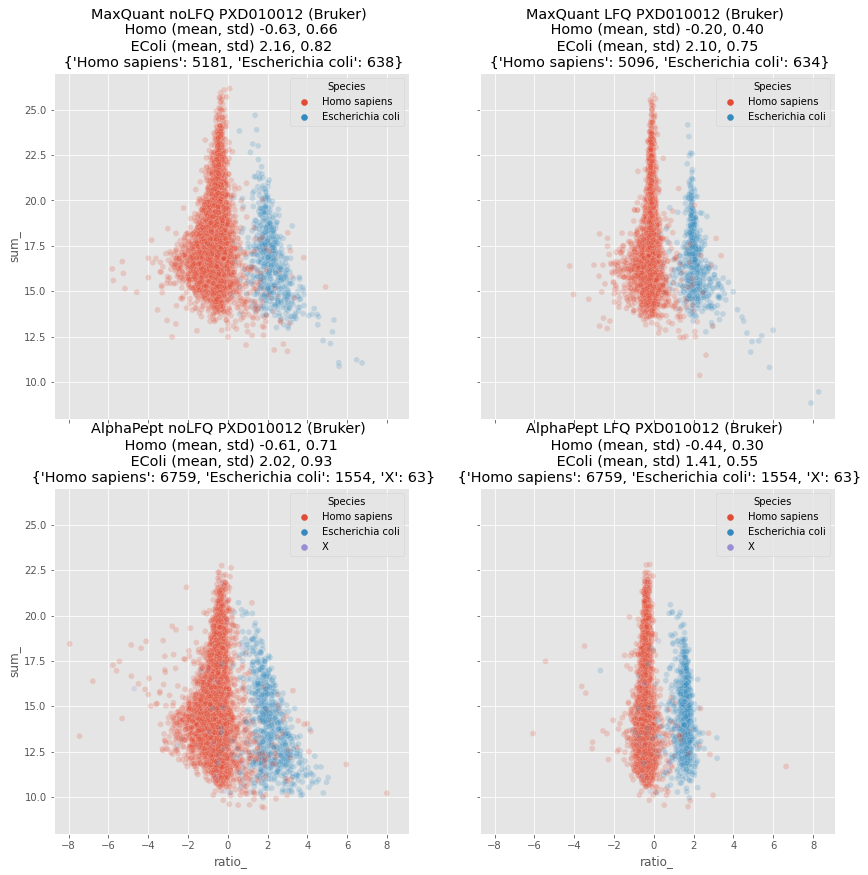

In [25]:
from test_helper import get_plot_df
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD010012_ref.txt'), sep='\t') 

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Base_{i}" for i in range(1,6)]
    ratio_columns = [f"{x}ntensity Ratio_{i}" for i in range(1,6)]

    id_ = 'MaxQuant ' +_+' PXD010012 (Bruker)'
    get_plot_df(ref, base_columns, ratio_columns, axes[0,j], id_)


path = 'E:/test_temp/results.hdf' #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')

species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD010012_CT_{i}_C1_01_Base{x}" for i in range(1,4)]
    ratio_columns = [f"PXD010012_CT_{i}_C2_01_Ratio{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD010012 (Bruker)'
    get_plot_df(ref, base_columns, ratio_columns, axes[1,j], id_)

plt.show()

C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\scipy\optimize\slsqp.py:63: RuntimeWarning: invalid value encountered in subtract
  jac[i] = (func(*((x0+dx,)+args)) - f0)/epsilon


C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\envs\alphapept\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


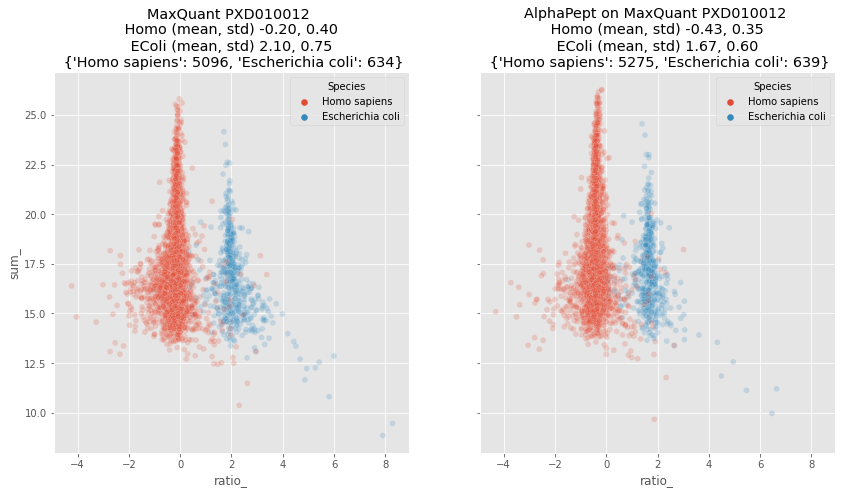

In [26]:
from test_helper import algorithm_test

evd = pd.read_csv(os.path.join(tmp_folder,'PXD010012_ref_evd.txt'), sep='\t') 
ref = pd.read_csv(os.path.join(tmp_folder,'PXD010012_ref.txt'), sep='\t') 

all_columns = [_ for _ in ref.columns if 'LFQ intensity ' in _]

base_columns = [_ for _ in all_columns if 'Base' in _]
ratio_columns = [_ for _ in all_columns if 'Ratio' in _]

experiments = evd['Raw file'].unique().tolist()

base_columns2 = [_ for _ in experiments if 'Base' in _]
ratio_columns2 = [_ for _ in experiments if 'Ratio' in _]

test_id = 'PXD010012'

algorithm_test(evd, ref, base_columns, ratio_columns, base_columns2, ratio_columns2, test_id, software_1, software_2)